# CESM-HR  (iHESP)

`Labrador Coast Domain`

#### Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cartopy.mpl.gridliner as gridliner
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
%matplotlib inline
import time

In [2]:
start_time=time.time()

path = '/storage2/tkyeimiah'


aice_dh = xr.open_dataset(path+'/iHESP/EM1/hist/aice_hist/aice_hist.nc')
aice_dp = xr.open_dataset(path+'/iHESP/EM1/proj/aice_proj/aice_proj.nc')
hi_dh = xr.open_dataset(path+'/iHESP/EM1/hist/hi_hist/hi_hist.nc')
hi_dp = xr.open_dataset(path+'/iHESP/EM1/proj/hi_proj/hi_proj.nc')


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.630169153213501 seconds


### Sea Ice Extent

In [3]:
%%time
aice_hist=aice_dh['aice']
aice_proj=aice_dp['aice']

tarea_hist=aice_dh['uarea']
tarea_proj=aice_dp['uarea']

CPU times: user 125 µs, sys: 0 ns, total: 125 µs
Wall time: 137 µs


In [4]:
%%time
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69


# Create a mask for Labrador coast 
mask_hist = ((aice_hist.TLAT >= lat_min) & (aice_hist.TLAT <= lat_max) &
        (aice_hist.TLON >= lon_min) & (aice_hist.TLON <= lon_max))

mask_hist2 = ((tarea_hist.TLAT >= lat_min) & (tarea_hist.TLAT <= lat_max) &
        (tarea_hist.TLON >= lon_min) & (tarea_hist.TLON <= lon_max))

mask_proj = ((aice_proj.TLAT >= lat_min) & (aice_proj.TLAT <= lat_max) &
        (aice_proj.TLON >= lon_min) & (aice_proj.TLON <= lon_max))

mask_proj2 = ((tarea_proj.TLAT >= lat_min) & (tarea_proj.TLAT <= lat_max) &
        (tarea_proj.TLON >= lon_min) & (tarea_proj.TLON <= lon_max))

# Apply the mask to the aice variable
aice_hist_region_ =aice_hist.where(mask_hist, drop=True)
tarea_hist_region_=tarea_hist.where(mask_hist2, drop=True)
aice_proj_region_ =aice_proj.where(mask_proj, drop=True)
tarea_proj_region_=tarea_proj.where(mask_proj2, drop=True)

CPU times: user 1.99 s, sys: 10.8 s, total: 12.7 s
Wall time: 3min 6s


In [5]:
sic_greater_15hist = xr.where(aice_hist_region_ >= 15, 1, 0)
sic_greater_15proj = xr.where(aice_proj_region_ >= 15, 1, 0)

aice_hist_region = (sic_greater_15hist * tarea_hist_region_)/1e12
aice_proj_region = (sic_greater_15proj * tarea_proj_region_)/1e12

In [6]:
#plot for article
model_1990_99 = aice_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
model_2000_06 = aice_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
model_2007_20 = aice_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_2000_20 = xr.concat([model_2000_06, model_2007_20], dim='time')
#-----------
model_2040_60 = aice_proj_region.sel(time=slice('2040-01-01','2060-12-31'))
model_2080_100= aice_proj_region.sel(time=slice('2080-01-01','2100-12-31'))

In [7]:
model_1990_99_monthly = model_1990_99.groupby('time.month').mean('time').sum(('nj','ni'))
model_2000_20_monthly = model_2000_20.groupby('time.month').mean('time').sum(('nj','ni'))

In [8]:
model_1990_99_monmax = model_1990_99.groupby('time.month').max('time').sum(('nj','ni'))
model_2000_20_monmax = model_2000_20.groupby('time.month').max('time').sum(('nj','ni'))

In [9]:
model_1990_99_monmin = model_1990_99.groupby('time.month').min('time').sum(('nj','ni'))
model_2000_20_monmin = model_2000_20.groupby('time.month').min('time').sum(('nj','ni'))

In [10]:
#-----------

In [11]:
aice_1850_59=aice_hist_region.sel(time=slice('1850-02-01','1859-12-31'))
aice_1860_69=aice_hist_region.sel(time=slice('1860-01-01','1869-12-31'))
aice_1870_79=aice_hist_region.sel(time=slice('1870-01-01','1879-12-31'))
aice_1880_89=aice_hist_region.sel(time=slice('1880-01-01','1889-12-31'))
aice_1890_99=aice_hist_region.sel(time=slice('1890-01-01','1899-12-31'))
aice_1900_09=aice_hist_region.sel(time=slice('1900-01-01','1909-12-31'))
aice_1910_19=aice_hist_region.sel(time=slice('1910-01-01','1919-12-31'))
aice_1920_29=aice_hist_region.sel(time=slice('1920-01-01','1929-12-31'))
aice_1930_39=aice_hist_region.sel(time=slice('1930-01-01','1939-12-31'))
aice_1940_49=aice_hist_region.sel(time=slice('1940-01-01','1949-12-31'))
aice_1950_59=aice_hist_region.sel(time=slice('1950-01-01','1959-12-31'))
aice_1960_69=aice_hist_region.sel(time=slice('1960-01-01','1969-12-31'))
aice_1970_79=aice_hist_region.sel(time=slice('1970-01-01','1979-12-31'))
aice_1980_89=aice_hist_region.sel(time=slice('1980-01-01','1989-12-31'))
aice_1990_99=aice_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
aice_2000_06=aice_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
aice_2007_09=aice_proj_region.sel(time=slice('2006-02-01','2009-12-31'))

aice_2000_09 = xr.concat([aice_2000_06, aice_2007_09], dim='time')

aice_2010_19=aice_proj_region.sel(time=slice('2010-01-01','2019-12-31'))
aice_2020_29=aice_proj_region.sel(time=slice('2020-01-01','2029-12-31'))
aice_2030_39=aice_proj_region.sel(time=slice('2030-01-01','2039-12-31'))
aice_2040_49=aice_proj_region.sel(time=slice('2040-01-01','2049-12-31'))
aice_2050_59=aice_proj_region.sel(time=slice('2050-01-01','2059-12-31'))
aice_2060_69=aice_proj_region.sel(time=slice('2060-01-01','2069-12-31'))
aice_2070_79=aice_proj_region.sel(time=slice('2070-01-01','2079-12-31'))
aice_2080_89=aice_proj_region.sel(time=slice('2080-01-01','2089-12-31'))
aice_2090_100=aice_proj_region.sel(time=slice('2090-01-01','2100-12-31'))

In [12]:
aice_1850_59_monthly = aice_1850_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1860_69_monthly = aice_1860_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1870_79_monthly = aice_1870_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1880_89_monthly = aice_1880_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1890_99_monthly = aice_1890_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1900_09_monthly = aice_1900_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1910_19_monthly = aice_1910_19.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1920_29_monthly = aice_1920_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1930_39_monthly = aice_1930_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1940_49_monthly = aice_1940_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1950_59_monthly = aice_1950_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1960_69_monthly = aice_1960_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1970_79_monthly = aice_1970_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1980_89_monthly = aice_1980_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1990_99_monthly = aice_1990_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2000_09_monthly = aice_2000_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2010_19_monthly = aice_2010_19.groupby('time.month').mean('time').sum(('nj','ni'))

aice_2020_29_monthly = aice_2020_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2030_39_monthly = aice_2030_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2040_49_monthly = aice_2040_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2050_59_monthly = aice_2050_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2060_69_monthly = aice_2060_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2070_79_monthly = aice_2070_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2080_89_monthly = aice_2080_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2090_100_monthly = aice_2090_100.groupby('time.month').mean('time').sum(('nj','ni'))


In [13]:

aice_1990_99_monmax = aice_1990_99.groupby('time.month').max('time').sum(('nj','ni'))
aice_2000_09_monmax = aice_2000_09.groupby('time.month').max('time').sum(('nj','ni'))
aice_2010_19_monmax = aice_2010_19.groupby('time.month').max('time').sum(('nj','ni'))

aice_2020_29_monmax = aice_2020_29.groupby('time.month').max('time').sum(('nj','ni'))
aice_2030_39_monmax = aice_2030_39.groupby('time.month').max('time').sum(('nj','ni'))
aice_2040_49_monmax = aice_2040_49.groupby('time.month').max('time').sum(('nj','ni'))
aice_2050_59_monmax = aice_2050_59.groupby('time.month').max('time').sum(('nj','ni'))
aice_2060_69_monmax = aice_2060_69.groupby('time.month').max('time').sum(('nj','ni'))

aice_2070_79_monmax = aice_2070_79.groupby('time.month').max('time').sum(('nj','ni'))
aice_2080_89_monmax = aice_2080_89.groupby('time.month').max('time').sum(('nj','ni'))
aice_2090_100_monmax = aice_2090_100.groupby('time.month').max('time').sum(('nj','ni'))

In [14]:
#min
aice_1990_99_monmin = aice_1990_99.groupby('time.month').min('time').sum(('nj','ni'))
aice_2000_09_monmin = aice_2000_09.groupby('time.month').min('time').sum(('nj','ni'))
aice_2010_19_monmin = aice_2010_19.groupby('time.month').min('time').sum(('nj','ni'))

aice_2020_29_monmin = aice_2020_29.groupby('time.month').min('time').sum(('nj','ni'))
aice_2030_39_monmin = aice_2030_39.groupby('time.month').min('time').sum(('nj','ni'))
aice_2040_49_monmin = aice_2040_49.groupby('time.month').min('time').sum(('nj','ni'))
aice_2050_59_monmin = aice_2050_59.groupby('time.month').min('time').sum(('nj','ni'))
aice_2060_69_monmin = aice_2060_69.groupby('time.month').min('time').sum(('nj','ni'))

aice_2070_79_monmin = aice_2070_79.groupby('time.month').min('time').sum(('nj','ni'))
aice_2080_89_monmin = aice_2080_89.groupby('time.month').min('time').sum(('nj','ni'))
aice_2090_100_monmin = aice_2090_100.groupby('time.month').min('time').sum(('nj','ni'))

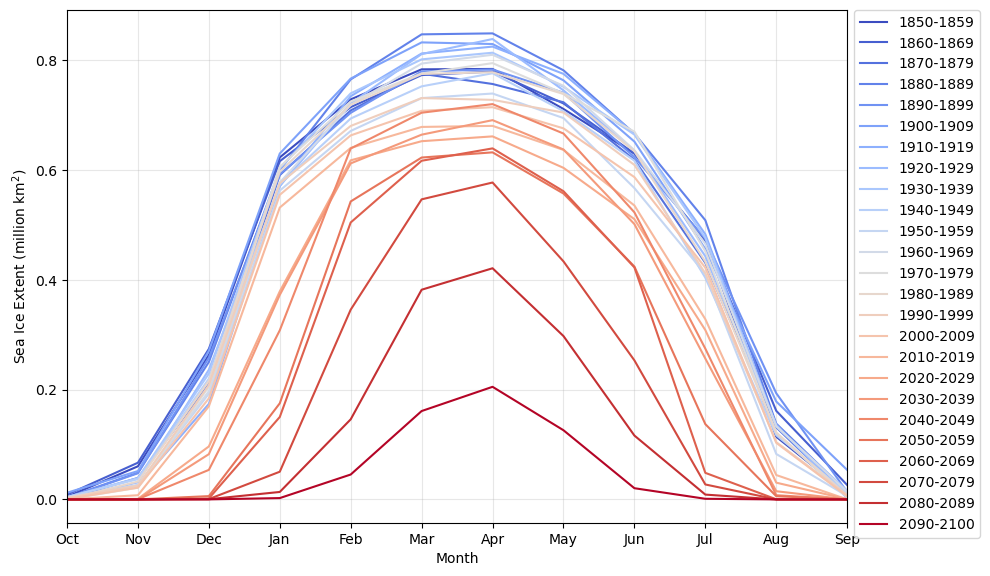

Execution time:  0.0 hours, 0.0 minutes, 1.2365097999572754 seconds


In [15]:
start_time=time.time()
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [aice_1850_59_monthly,aice_1860_69_monthly,aice_1870_79_monthly,aice_1880_89_monthly,aice_1890_99_monthly,
            aice_1900_09_monthly,aice_1910_19_monthly,aice_1920_29_monthly,aice_1930_39_monthly,aice_1940_49_monthly,
            aice_1950_59_monthly,aice_1960_69_monthly,aice_1970_79_monthly,aice_1980_89_monthly,aice_1990_99_monthly,
            aice_2000_09_monthly,aice_2010_19_monthly,aice_2020_29_monthly,aice_2030_39_monthly,aice_2040_49_monthly,
            aice_2050_59_monthly,aice_2060_69_monthly,aice_2070_79_monthly,aice_2080_89_monthly,aice_2090_100_monthly]


labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 25)

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
             label=labels[i])

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
#plt.title('Decadal monthly mean Sea Ice Extent \n(iHESP)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize=10, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('1.jpg',dpi=300, bbox_inches='tight')

plt.show()

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
#every 20 years
# min and max 

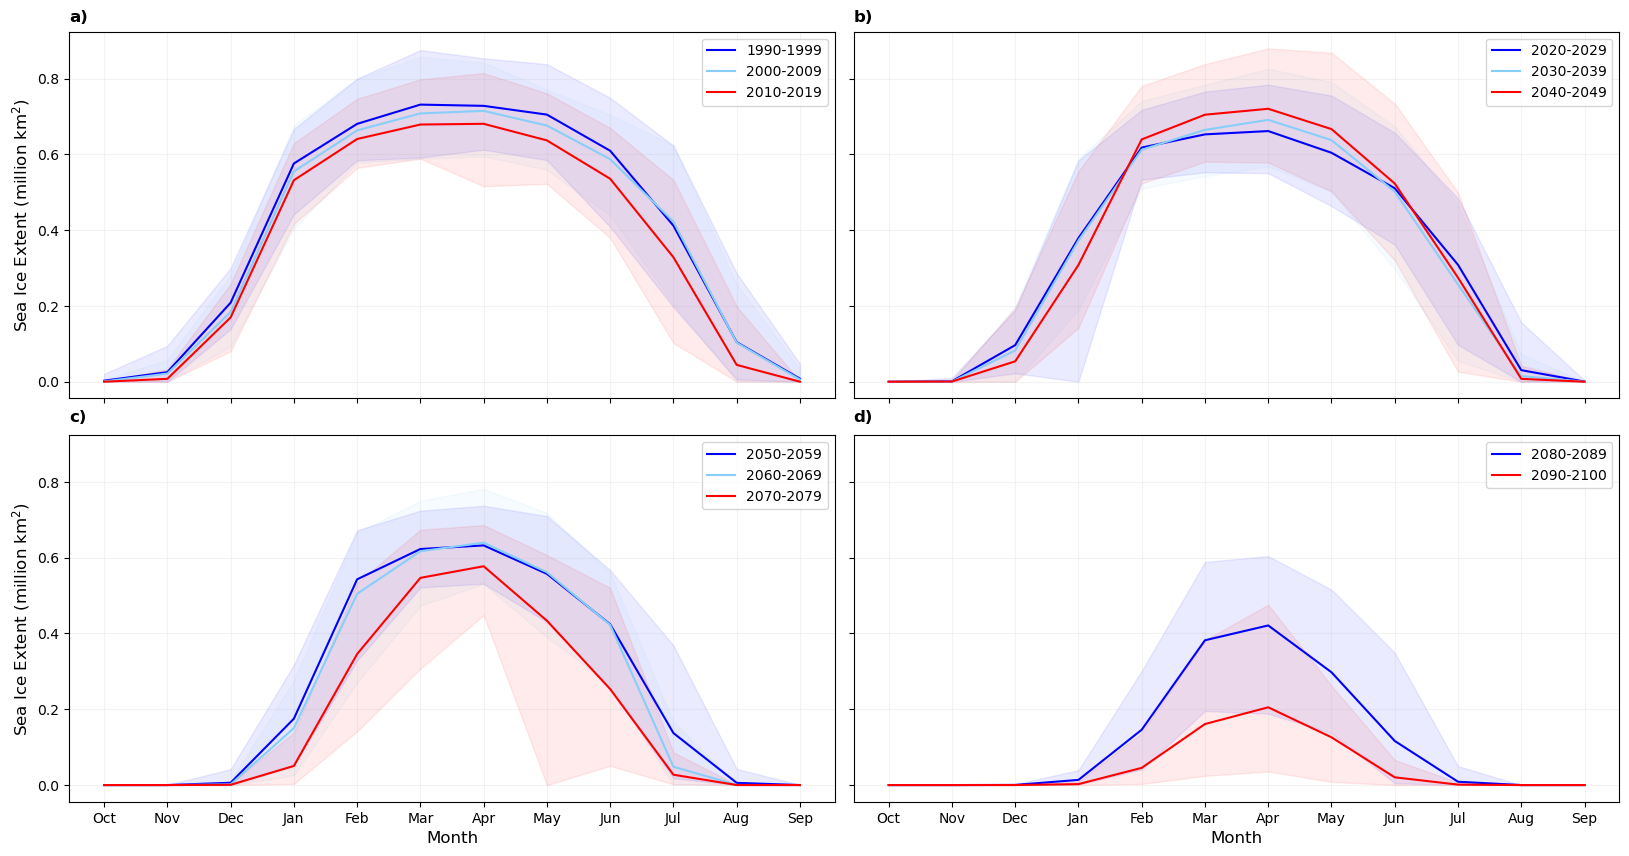

Execution time:  0.0 hours, 0.0 minutes, 1.6257085800170898 seconds


In [16]:
start_time=time.time()
# Set xticks to represent months from January to December
fig,ax=plt.subplots(2,2,figsize=(20,10),sharex='all', sharey='all')

all_data = [aice_1990_99_monthly, aice_2000_09_monthly, aice_2010_19_monthly]
all_data1= [aice_2020_29_monthly, aice_2030_39_monthly, aice_2040_49_monthly]
all_data2= [aice_2050_59_monthly, aice_2060_69_monthly, aice_2070_79_monthly]
all_data3= [aice_2080_89_monthly, aice_2090_100_monthly]

max_data = [aice_1990_99_monmax, aice_2000_09_monmax, aice_2010_19_monmax]
max_data1= [aice_2020_29_monmax, aice_2030_39_monmax, aice_2040_49_monmax]
max_data2= [aice_2050_59_monmax, aice_2060_69_monmax, aice_2070_79_monmax]
max_data3= [aice_2080_89_monmax, aice_2090_100_monmax]

min_data = [aice_1990_99_monmin, aice_2000_09_monmin, aice_2010_19_monmin]
min_data1= [aice_2020_29_monmin, aice_2030_39_monmin, aice_2040_49_monmin]
min_data2= [aice_2050_59_monmin, aice_2060_69_monmin, aice_2070_79_monmin]
min_data3= [aice_2080_89_monmin, aice_2090_100_monmin]

months= np.arange(0,12)

label = ['1990-1999', '2000-2009', '2010-2019']
label1= ['2020-2029', '2030-2039', '2040-2049']
label2= ['2050-2059', '2060-2069', '2070-2079']
label3= ['2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 6)
cmap1 = plt.cm.get_cmap('coolwarm', 4)

cmap = ['blue','lightskyblue','red']
cmap1 = ['blue','red']

for i in range(2):
    for j in range(2):   
        if i == 0:
            linestyle = '-'
            if j == 0:
                t=0
                for data in range(3):
                    ax[i,j].plot(months, np.append(all_data[data][9:], all_data[data][:9]), color=cmap[data], linestyle=linestyle, label=label[data])
                    ax[i,j].fill_between(months, np.append(min_data[data][9:],min_data[data][:9]), np.append(max_data[data][9:],max_data[data][:9]), color=cmap[data], alpha=0.08)
                    t+=2
            elif j == 1:
                t1=0
                for data1 in range(3):
                    ax[i,j].plot(months, np.append(all_data1[data1][9:], all_data1[data1][:9]), color=cmap[data1], linestyle=linestyle, label=label1[data1])
                    ax[i,j].fill_between(months, np.append(min_data1[data1][9:],min_data1[data1][:9]), np.append(max_data1[data1][9:],max_data1[data1][:9]), color=cmap[data1], alpha=0.08)
                    t1+=2       
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            
        #----------------------------------                      
        elif i==1:
            linestyle = '-'
            if j == 0:
                t2=0
                for data2 in range(3):
                    ax[i,j].plot(months, np.append(all_data2[data2][9:], all_data2[data2][:9]), color=cmap[data2], linestyle=linestyle, label=label2[data2])
                    ax[i,j].fill_between(months, np.append(min_data2[data2][9:],min_data2[data2][:9]), np.append(max_data2[data2][9:],max_data2[data2][:9]), color=cmap[data2], alpha=0.08)
                    t2+=2
            elif j == 1:
                t3=0
                for data3 in range(2):
                    ax[i,j].plot(months, np.append(all_data3[data3][9:], all_data3[data3][:9]), color=cmap1[data3], linestyle=linestyle, label=label3[data3])
                    ax[i,j].fill_between(months, np.append(min_data3[data3][9:],min_data3[data3][:9]), np.append(max_data3[data3][9:],max_data3[data3][:9]), color=cmap1[data3], alpha=0.08)
                    t3+=2
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            ax[i,j].set_xlabel('Month',  fontsize=12)
            ax[i,j].set_xticks(months, ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep',])
            
        #---------------------------------- 
             
        ax[0,0].set_ylabel('Sea Ice Extent (million km$^2$)',  fontsize=12)
        ax[1,0].set_ylabel('Sea Ice Extent (million km$^2$)', fontsize=12)
        
        #---------------------------------- 
        
        
for k in range(4):
    #x=[0.125,0.387,0.649,0.125,0.387,0.649]   
    #y=[0.89,0.89,0.89,0.49,0.49,0.49] 
    #letter=['a)','b)','c)','d)','e)','f)']
    x=[0.125,0.517,0.125,0.517]   
    y=[0.89,0.89,0.49,0.49] 
    letter=['a)','b)','c)','d)']
    fig.text(x[k],y[k],letter[k],fontweight='bold', fontsize=12)


'''
    # Default linestyle
    ax.plot(months, np.append(all_data[i][9:],all_data[i][:9]), color=cmap(i), linestyle=linestyle,
             label=labels[i])
    ax.fill_between(months, np.append(min_data[i][9:],min_data[i][:9]),np.append(max_data[i][9:],max_data[i][:9]), color=cmap(i), alpha=0.05)

plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
#plt.title('Decadal monthly mean Sea Ice Extent \n(iHESP)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize=10, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
'''
#plt.tight_layout()

plt.savefig('1sur.jpg',dpi=300, bbox_inches='tight')


plt.subplots_adjust(wspace=0.025, hspace=0.1)
plt.show()



end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
#every 20 years
# min and max 

### April

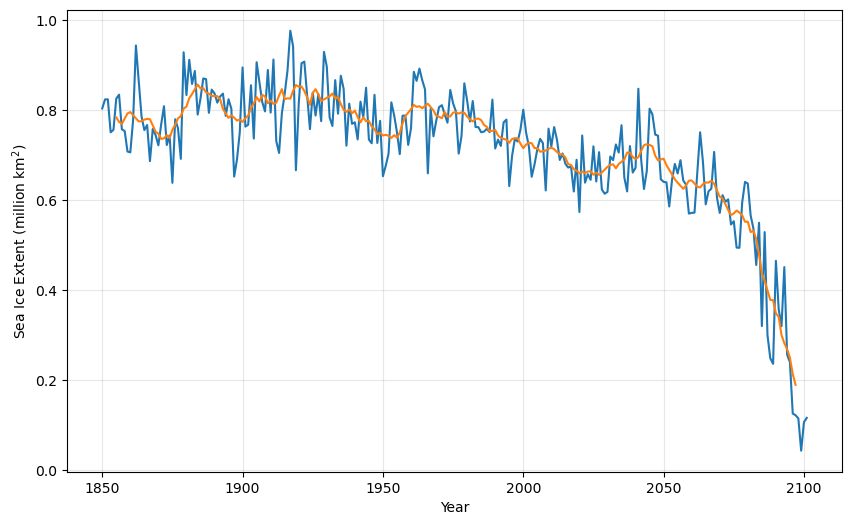

In [17]:
fig, ax=plt.subplots(figsize=(10,6))

april_aice_hist = aice_hist_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice_proj = aice_proj_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice=xr.concat([april_aice_hist,april_aice_proj], dim='time')

ax.plot(np.arange(1850,2102),april_aice)
ax.plot(np.arange(1850,2102),april_aice.rolling(time=10, center=True).mean())

#rect=ax.add_patch(Rectangle((2050, 0.63), 35, 0.66, edgecolor='red',facecolor='none',lw=2,))
#rect.set_zorder(10)
#plt.title('April Sea Ice Extent with a 10-year running mean for 1850 to 2100 \n(iHESP)', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
#plt.savefig('April_SIE.jpg',dpi=300, bbox_inches='tight')
plt.show()

### Sea Ice Concentration

In [18]:
#plot for article
model_sic_1990_99 = aice_hist_region_.sel(time=slice('1990-01-01','1999-12-31'))
model_sic_2000_06 = aice_hist_region_.sel(time=slice('2000-01-01','2006-01-01'))
model_sic_2007_20 = aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
model_sic_2000_20 = xr.concat([model_sic_2000_06, model_sic_2007_20], dim='time')
model_sic_2040_60 = aice_proj_region_.sel(time=slice('2040-01-01','2060-12-31'))
model_sic_2080_100= aice_proj_region_.sel(time=slice('2080-01-01','2100-12-31'))

In [19]:
sic_1850_59 = aice_hist_region_.sel(time=slice('1850-01-01','1859-12-31'))
sic_1860_69 = aice_hist_region_.sel(time=slice('1860-01-01','1869-12-31'))
sic_1870_79 = aice_hist_region_.sel(time=slice('1870-01-01','1879-12-31'))
sic_1880_89 = aice_hist_region_.sel(time=slice('1880-01-01','1889-12-31'))
sic_1890_99 = aice_hist_region_.sel(time=slice('1890-01-01','1899-12-31'))
sic_1900_09 = aice_hist_region_.sel(time=slice('1900-01-01','1909-12-31'))
sic_1910_19 = aice_hist_region_.sel(time=slice('1910-01-01','1919-12-31'))
sic_1920_29 = aice_hist_region_.sel(time=slice('1920-01-01','1929-12-31'))
sic_1930_39 = aice_hist_region_.sel(time=slice('1930-01-01','1939-12-31'))
sic_1940_49 = aice_hist_region_.sel(time=slice('1940-01-01','1949-12-31'))
sic_1950_59 = aice_hist_region_.sel(time=slice('1950-01-01','1959-12-31'))
sic_1960_69 = aice_hist_region_.sel(time=slice('1960-01-01','1969-12-31'))
sic_1970_79 = aice_hist_region_.sel(time=slice('1970-01-01','1979-12-31'))
sic_1980_89 = aice_hist_region_.sel(time=slice('1980-01-01','1989-12-31'))
sic_1990_99 = aice_hist_region_.sel(time=slice('1990-01-01','1999-12-31'))
sic_2000_06 = aice_hist_region_.sel(time=slice('2000-01-01','2006-01-01'))
sic_2007_09 = aice_proj_region_.sel(time=slice('2006-02-01','2009-12-31'))
sic_2000_09 = xr.concat([sic_2000_06, sic_2007_09], dim='time')

sic_2010_19 = aice_proj_region_.sel(time=slice('2010-01-01','2019-12-31'))
sic_2020_29 = aice_proj_region_.sel(time=slice('2020-01-01','2029-12-31'))
sic_2030_39 = aice_proj_region_.sel(time=slice('2030-01-01','2039-12-31'))
sic_2040_49 = aice_proj_region_.sel(time=slice('2040-01-01','2049-12-31'))
sic_2050_59 = aice_proj_region_.sel(time=slice('2050-01-01','2059-12-31'))
sic_2060_69 = aice_proj_region_.sel(time=slice('2060-01-01','2069-12-31'))
sic_2070_79 = aice_proj_region_.sel(time=slice('2070-01-01','2079-12-31'))
sic_2080_89 = aice_proj_region_.sel(time=slice('2080-01-01','2089-12-31'))
sic_2090_100 = aice_proj_region_.sel(time=slice('2090-01-01','2100-12-31'))

Execution time:  0.0 hours, 0.0 minutes, 58.369954109191895 seconds


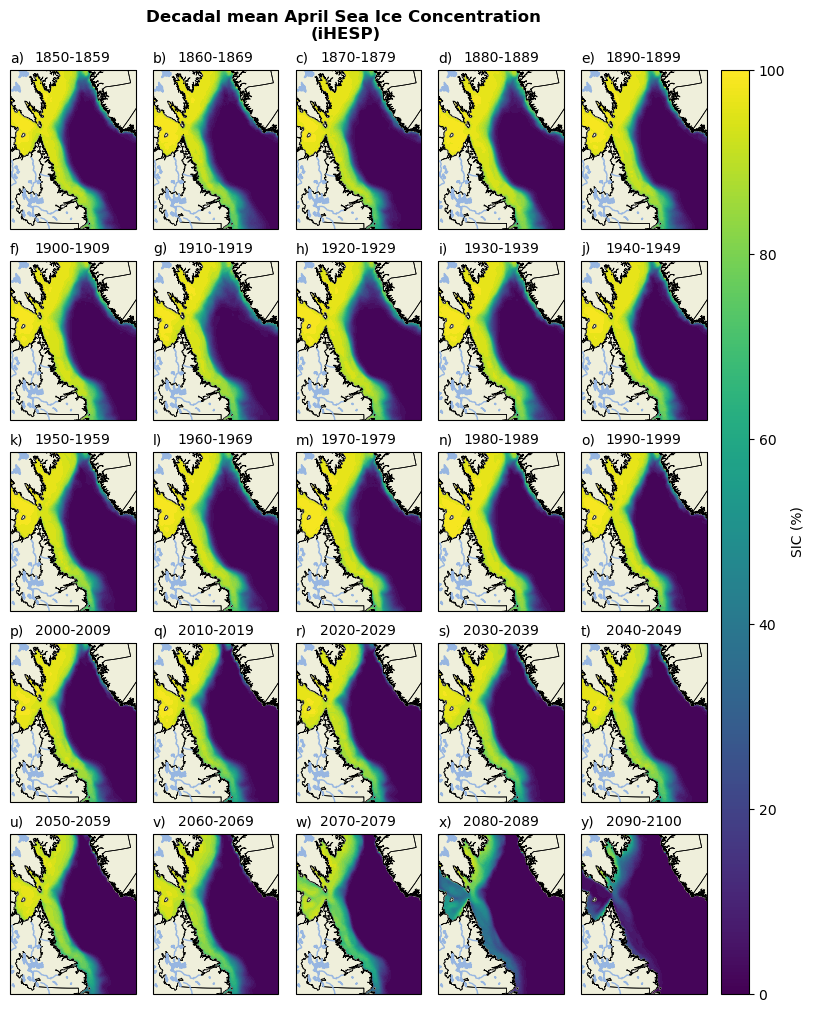

In [20]:
start_time=time.time()

# Create a figure with two subplots
fig = plt.figure(figsize=(10,12))
selected_data = [sic_1850_59, sic_1860_69, sic_1870_79, sic_1880_89, sic_1890_99, sic_1900_09, sic_1910_19,
                 sic_1920_29, sic_1930_39, sic_1940_49, sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89,
                 sic_1990_99, sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49, sic_2050_59,
                 sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45,transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                    norm=norm, levels=45,transform=ccrs.PlateCarree())
        #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time')*100,
                #colors='red',levels=[15], transform=ccrs.PlateCarree())
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  
plt.suptitle('Decadal mean April Sea Ice Concentration \n(iHESP)', fontweight='bold', y=0.93)
plt.subplots_adjust(wspace=-0.3)

#plt.tight_layout()
plt.savefig('Apri_SIC',dpi=300, bbox_inches='tight')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Sea Ice Thickness

In [21]:
hi_hist=hi_dh['hi']
hi_proj=hi_dp['hi']

In [22]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69

# Create a mask for Labrador coast 
mask_hist3 = ((hi_hist.TLAT >= lat_min) & (hi_hist.TLAT <= lat_max) &
              (hi_hist.TLON >= lon_min) & (hi_hist.TLON <= lon_max))


mask_proj3 = ((hi_proj.TLAT >= lat_min) & (hi_proj.TLAT <= lat_max) &
              (hi_proj.TLON >= lon_min) & (hi_proj.TLON <= lon_max))

# Apply the mask to the aice variable
hi_hist_region=hi_hist.where(mask_hist3, drop=True)
hi_proj_region=hi_proj.where(mask_proj3, drop=True)

In [23]:
#plot for article
model_hi_1990_99 = hi_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
model_hi_2000_06 = hi_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
model_hi_2007_20 = hi_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_hi_2000_20 = xr.concat([model_hi_2000_06, model_hi_2007_20], dim='time')
model_hi_2040_60 = hi_proj_region.sel(time=slice('2040-01-01','2060-12-31'))
model_hi_2080_100= hi_proj_region.sel(time=slice('2080-01-01','2100-12-31'))

In [24]:
model_hi_1990_99_monthly = model_hi_1990_99.groupby('time.month').mean('time').mean(('nj','ni'))
model_hi_2000_20_monthly = model_hi_2000_20.groupby('time.month').mean('time').mean(('nj','ni'))

In [25]:
model_hi_1990_99_monmax = model_hi_1990_99.groupby('time.month').max('time').mean(('nj','ni'))
model_hi_2000_20_monmax = model_hi_2000_20.groupby('time.month').max('time').mean(('nj','ni'))

In [26]:
model_hi_1990_99_monmin = model_hi_1990_99.groupby('time.month').min('time').mean(('nj','ni'))
model_hi_2000_20_monmin = model_hi_2000_20.groupby('time.month').min('time').mean(('nj','ni'))

In [27]:
# ------

In [28]:
hi_1850_59=hi_hist_region.sel(time=slice('1850-02-01','1859-12-31'))
hi_1860_69=hi_hist_region.sel(time=slice('1860-01-01','1869-12-31'))
hi_1870_79=hi_hist_region.sel(time=slice('1870-01-01','1879-12-31'))
hi_1880_89=hi_hist_region.sel(time=slice('1880-01-01','1889-12-31'))
hi_1890_99=hi_hist_region.sel(time=slice('1890-01-01','1899-12-31'))
hi_1900_09=hi_hist_region.sel(time=slice('1900-01-01','1909-12-31'))
hi_1910_19=hi_hist_region.sel(time=slice('1910-01-01','1919-12-31'))
hi_1920_29=hi_hist_region.sel(time=slice('1920-01-01','1929-12-31'))
hi_1930_39=hi_hist_region.sel(time=slice('1930-01-01','1939-12-31'))
hi_1940_49=hi_hist_region.sel(time=slice('1940-01-01','1949-12-31'))
hi_1950_59=hi_hist_region.sel(time=slice('1950-01-01','1959-12-31'))
hi_1960_69=hi_hist_region.sel(time=slice('1960-01-01','1969-12-31'))
hi_1970_79=hi_hist_region.sel(time=slice('1970-01-01','1979-12-31'))
hi_1980_89=hi_hist_region.sel(time=slice('1980-01-01','1989-12-31'))
hi_1990_99=hi_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
hi_2000_06=hi_hist_region.sel(time=slice('2000-01-01','2006-01-01'))
hi_2007_09=hi_proj_region.sel(time=slice('2006-02-01','2009-12-31'))

hi_2000_09 = xr.concat([hi_2000_06, hi_2007_09], dim='time')

hi_2010_19=hi_proj_region.sel(time=slice('2010-01-01','2019-12-31'))
hi_2020_29=hi_proj_region.sel(time=slice('2020-01-01','2029-12-31'))
hi_2030_39=hi_proj_region.sel(time=slice('2030-01-01','2039-12-31'))
hi_2040_49=hi_proj_region.sel(time=slice('2040-01-01','2049-12-31'))
hi_2050_59=hi_proj_region.sel(time=slice('2050-01-01','2059-12-31'))
hi_2060_69=hi_proj_region.sel(time=slice('2060-01-01','2069-12-31'))
hi_2070_79=hi_proj_region.sel(time=slice('2070-01-01','2079-12-31'))
hi_2080_89=hi_proj_region.sel(time=slice('2080-01-01','2089-12-31'))
hi_2090_100=hi_proj_region.sel(time=slice('2090-01-01','2100-12-31'))

In [29]:
hi_1850_59_monthly = hi_1850_59.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1860_69_monthly = hi_1860_69.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1870_79_monthly = hi_1870_79.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1880_89_monthly = hi_1880_89.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1890_99_monthly = hi_1890_99.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1900_09_monthly = hi_1900_09.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1910_19_monthly = hi_1910_19.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1920_29_monthly = hi_1920_29.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1930_39_monthly = hi_1930_39.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1940_49_monthly = hi_1940_49.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1950_59_monthly = hi_1950_59.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1960_69_monthly = hi_1960_69.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1970_79_monthly = hi_1970_79.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1980_89_monthly = hi_1980_89.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1990_99_monthly = hi_1990_99.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2000_09_monthly = hi_2000_09.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2010_19_monthly = hi_2010_19.groupby('time.month').mean('time').mean(('nj','ni'))

hi_2020_29_monthly = hi_2020_29.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2030_39_monthly = hi_2030_39.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2040_49_monthly = hi_2040_49.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2050_59_monthly = hi_2050_59.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2060_69_monthly = hi_2060_69.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2070_79_monthly = hi_2070_79.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2080_89_monthly = hi_2080_89.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2090_100_monthly = hi_2090_100.groupby('time.month').mean('time').mean(('nj','ni'))

In [30]:
hi_1990_99_monmax = hi_1990_99.groupby('time.month').max('time').mean(('nj','ni'))
hi_2000_09_monmax = hi_2000_09.groupby('time.month').max('time').mean(('nj','ni'))
hi_2010_19_monmax = hi_2010_19.groupby('time.month').max('time').mean(('nj','ni'))

hi_2020_29_monmax = hi_2020_29.groupby('time.month').max('time').mean(('nj','ni'))
hi_2030_39_monmax = hi_2030_39.groupby('time.month').max('time').mean(('nj','ni'))
hi_2040_49_monmax = hi_2040_49.groupby('time.month').max('time').mean(('nj','ni'))
hi_2050_59_monmax = hi_2050_59.groupby('time.month').max('time').mean(('nj','ni'))
hi_2060_69_monmax = hi_2060_69.groupby('time.month').max('time').mean(('nj','ni'))

hi_2070_79_monmax = hi_2070_79.groupby('time.month').max('time').mean(('nj','ni'))
hi_2080_89_monmax = hi_2080_89.groupby('time.month').max('time').mean(('nj','ni'))
hi_2090_100_monmax = hi_2090_100.groupby('time.month').max('time').mean(('nj','ni'))

In [31]:
hi_1990_99_monmin = hi_1990_99.groupby('time.month').min('time').mean(('nj','ni'))
hi_2000_09_monmin = hi_2000_09.groupby('time.month').min('time').mean(('nj','ni'))
hi_2010_19_monmin = hi_2010_19.groupby('time.month').min('time').mean(('nj','ni'))

hi_2020_29_monmin = hi_2020_29.groupby('time.month').min('time').mean(('nj','ni'))
hi_2030_39_monmin = hi_2030_39.groupby('time.month').min('time').mean(('nj','ni'))
hi_2040_49_monmin = hi_2040_49.groupby('time.month').min('time').mean(('nj','ni'))
hi_2050_59_monmin = hi_2050_59.groupby('time.month').min('time').mean(('nj','ni'))
hi_2060_69_monmin = hi_2060_69.groupby('time.month').min('time').mean(('nj','ni'))

hi_2070_79_monmin = hi_2070_79.groupby('time.month').min('time').mean(('nj','ni'))
hi_2080_89_monmin = hi_2080_89.groupby('time.month').min('time').mean(('nj','ni'))
hi_2090_100_monmin = hi_2090_100.groupby('time.month').min('time').mean(('nj','ni'))

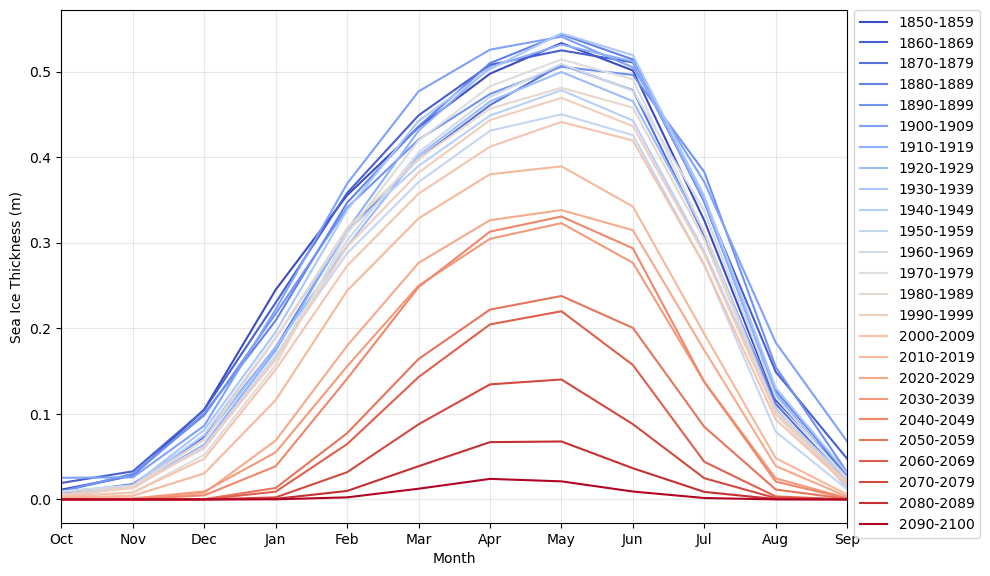

Execution time:  0.0 hours, 0.0 minutes, 0.8186309337615967 seconds


In [32]:
start_time=time.time()
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [hi_1850_59_monthly, hi_1860_69_monthly, hi_1870_79_monthly, hi_1880_89_monthly, hi_1890_99_monthly,
            hi_1900_09_monthly, hi_1910_19_monthly, hi_1920_29_monthly, hi_1930_39_monthly, hi_1940_49_monthly,
            hi_1950_59_monthly, hi_1960_69_monthly, hi_1970_79_monthly, hi_1980_89_monthly, hi_1990_99_monthly,
            hi_2000_09_monthly, hi_2010_19_monthly, hi_2020_29_monthly, hi_2030_39_monthly, hi_2040_49_monthly,
            hi_2050_59_monthly, hi_2060_69_monthly, hi_2070_79_monthly, hi_2080_89_monthly, hi_2090_100_monthly]

labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 25)

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
             label=labels[i])

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Thickness (m)')
#plt.title('Decadal monthly mean Sea Ice Extent \n(iHESP)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize=10, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('2.jpg',dpi=300, bbox_inches='tight')

plt.show()

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

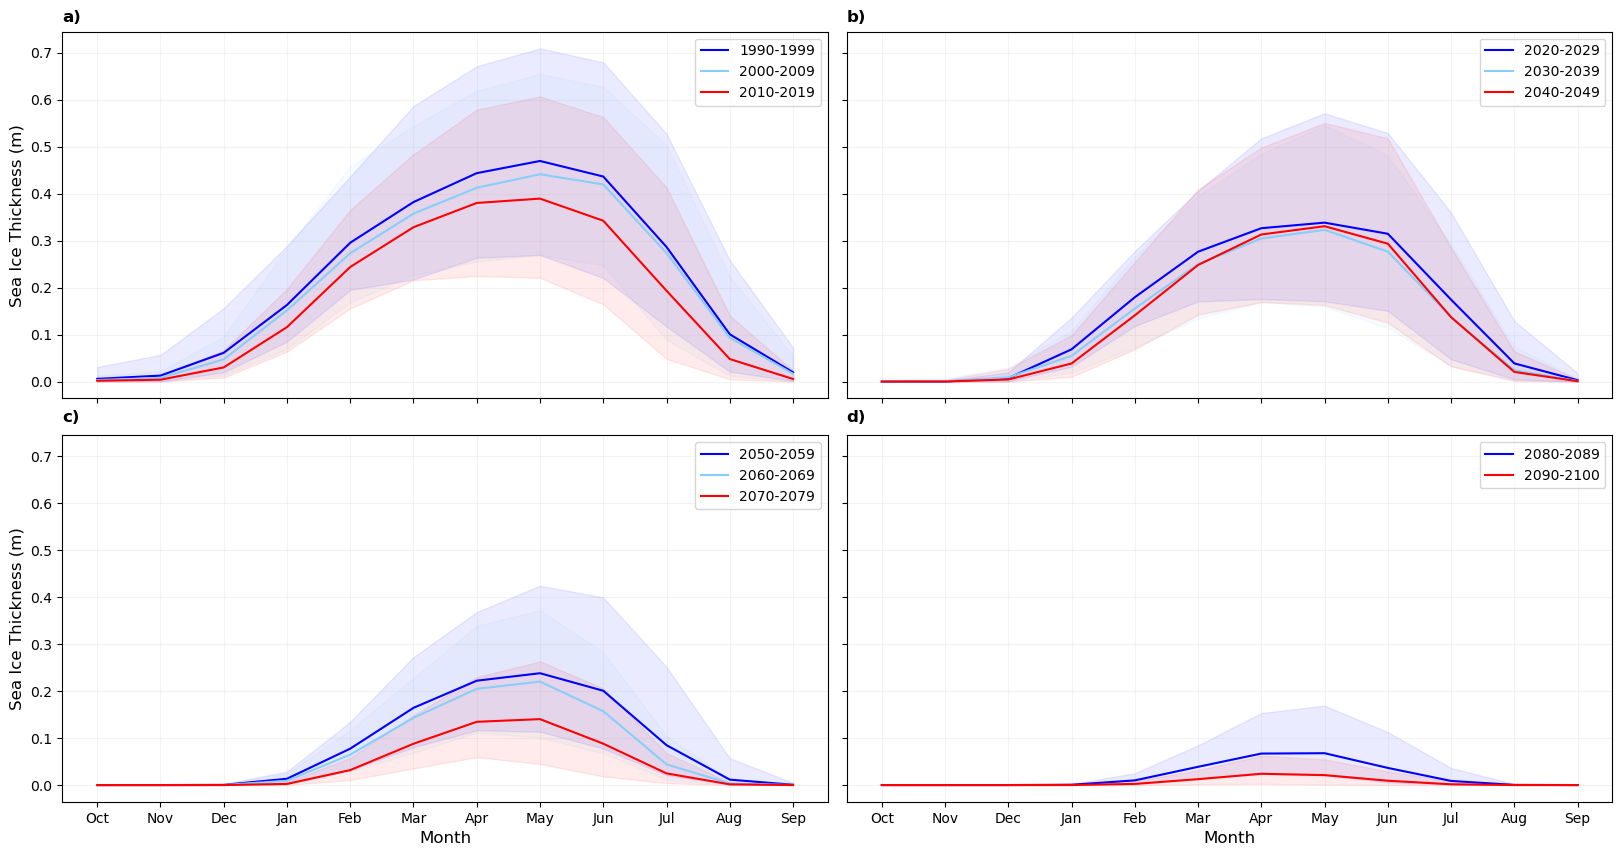

Execution time:  0.0 hours, 0.0 minutes, 1.4484758377075195 seconds


In [33]:
start_time=time.time()
# Set xticks to represent months from January to December
fig,ax=plt.subplots(2,2,figsize=(20,10),sharex='all', sharey='all')

all_data = [hi_1990_99_monthly, hi_2000_09_monthly, hi_2010_19_monthly]
all_data1= [hi_2020_29_monthly, hi_2030_39_monthly, hi_2040_49_monthly]
all_data2= [hi_2050_59_monthly, hi_2060_69_monthly, hi_2070_79_monthly]
all_data3= [hi_2080_89_monthly, hi_2090_100_monthly]

max_data = [hi_1990_99_monmax, hi_2000_09_monmax, hi_2010_19_monmax]
max_data1= [hi_2020_29_monmax, hi_2030_39_monmax, hi_2040_49_monmax]
max_data2= [hi_2050_59_monmax, hi_2060_69_monmax, hi_2070_79_monmax]
max_data3= [hi_2080_89_monmax, hi_2090_100_monmax]

min_data = [hi_1990_99_monmin, hi_2000_09_monmin, hi_2010_19_monmin]
min_data1= [hi_2020_29_monmin, hi_2030_39_monmin, hi_2040_49_monmin]
min_data2= [hi_2050_59_monmin, hi_2060_69_monmin, hi_2070_79_monmin]
min_data3= [hi_2080_89_monmin, hi_2090_100_monmin]


months= np.arange(0,12)

label = ['1990-1999', '2000-2009', '2010-2019']
label1= ['2020-2029', '2030-2039', '2040-2049']
label2= ['2050-2059', '2060-2069', '2070-2079']
label3= ['2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 6)
cmap1 = plt.cm.get_cmap('coolwarm', 4)

cmap = ['blue','lightskyblue','red']
cmap1 = ['blue','red']

for i in range(2):
    for j in range(2):   
        if i == 0:
            linestyle = '-'
            if j == 0:
                t=0
                for data in range(3):
                    ax[i,j].plot(months, np.append(all_data[data][9:], all_data[data][:9]), color=cmap[data], linestyle=linestyle, label=label[data])
                    ax[i,j].fill_between(months, np.append(min_data[data][9:],min_data[data][:9]), np.append(max_data[data][9:],max_data[data][:9]), color=cmap[data], alpha=0.08)
                    t+=2
            elif j == 1:
                t1=0
                for data1 in range(3):
                    ax[i,j].plot(months, np.append(all_data1[data1][9:], all_data1[data1][:9]), color=cmap[data1], linestyle=linestyle, label=label1[data1])
                    ax[i,j].fill_between(months, np.append(min_data1[data1][9:],min_data1[data1][:9]), np.append(max_data1[data1][9:],max_data1[data1][:9]), color=cmap[data1], alpha=0.08)
                    t1+=2       
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            
        #----------------------------------                      
        elif i==1:
            linestyle = '-'
            if j == 0:
                t2=0
                for data2 in range(3):
                    ax[i,j].plot(months, np.append(all_data2[data2][9:], all_data2[data2][:9]), color=cmap[data2], linestyle=linestyle, label=label2[data2])
                    ax[i,j].fill_between(months, np.append(min_data2[data2][9:],min_data2[data2][:9]), np.append(max_data2[data2][9:],max_data2[data2][:9]), color=cmap[data2], alpha=0.08)
                    t2+=2
            elif j == 1:
                t3=0
                for data3 in range(2):
                    ax[i,j].plot(months, np.append(all_data3[data3][9:], all_data3[data3][:9]), color=cmap1[data3], linestyle=linestyle, label=label3[data3])
                    ax[i,j].fill_between(months, np.append(min_data3[data3][9:],min_data3[data3][:9]), np.append(max_data3[data3][9:],max_data3[data3][:9]), color=cmap1[data3], alpha=0.08)
                    t3+=2
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            ax[i,j].set_xlabel('Month',  fontsize=12)
            ax[i,j].set_xticks(months, ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep',])
            
        #---------------------------------- 
             
        ax[0,0].set_ylabel('Sea Ice Thickness (m)',  fontsize=12)
        ax[1,0].set_ylabel('Sea Ice Thickness (m)', fontsize=12)
        
        #---------------------------------- 
        
for k in range(4):
    #x=[0.125,0.387,0.649,0.125,0.387,0.649]   
    #y=[0.89,0.89,0.89,0.49,0.49,0.49] 
    #letter=['a)','b)','c)','d)','e)','f)']
    x=[0.125,0.517,0.125,0.517]   
    y=[0.89,0.89,0.49,0.49] 
    letter=['a)','b)','c)','d)']
    fig.text(x[k],y[k],letter[k],fontweight='bold', fontsize=12)

'''
    # Default linestyle
    ax.plot(months, np.append(all_data[i][9:],all_data[i][:9]), color=cmap(i), linestyle=linestyle,
             label=labels[i])
    ax.fill_between(months, np.append(min_data[i][9:],min_data[i][:9]),np.append(max_data[i][9:],max_data[i][:9]), color=cmap(i), alpha=0.05)

plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
#plt.title('Decadal monthly mean Sea Ice Extent \n(iHESP)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize=10, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
'''
#plt.tight_layout()

plt.savefig('2a.jpg',dpi=300, bbox_inches='tight')


plt.subplots_adjust(wspace=0.025, hspace=0.1)
plt.show()



end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
#every 20 years
# min and max 

### April

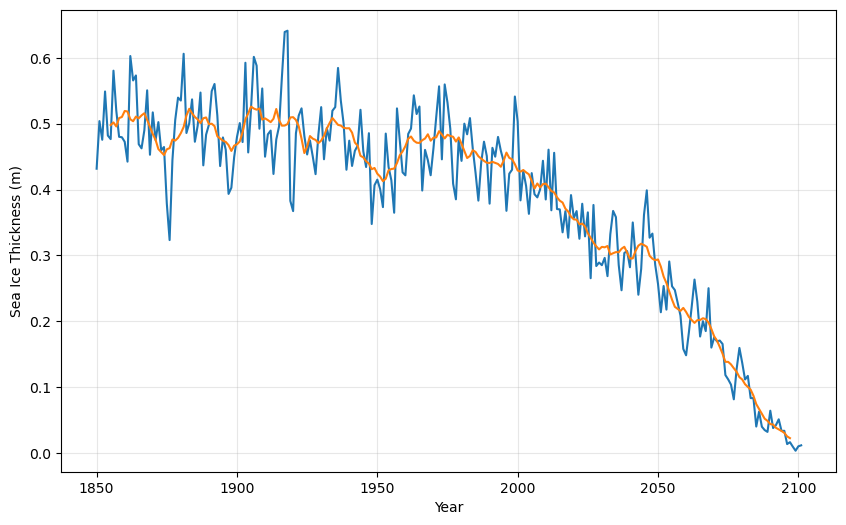

In [34]:
fig, ax=plt.subplots(figsize=(10,6))

april_hi_hist = hi_hist_region.sel(time=slice('1850','2100'))[2::12].mean(('nj', 'ni'))
april_hi_proj = hi_proj_region.sel(time=slice('1850','2100'))[2::12].mean(('nj', 'ni'))
april_hi=xr.concat([april_hi_hist,april_hi_proj], dim='time')

ax.plot(np.arange(1850,2102),april_hi)
ax.plot(np.arange(1850,2102),april_hi.rolling(time=10, center=True).mean())

#rect=ax.add_patch(Rectangle((2050, 0.63), 35, 0.66, edgecolor='red',facecolor='none',lw=2,))
#rect.set_zorder(10)
#plt.title('April Sea Ice Extent with a 10-year running mean for 1850 to 2100 \n(iHESP)', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (m)')
plt.grid(alpha=0.3)
#plt.savefig('April_SIE.jpg',dpi=300, bbox_inches='tight')
plt.show()

### April SIT and SIE

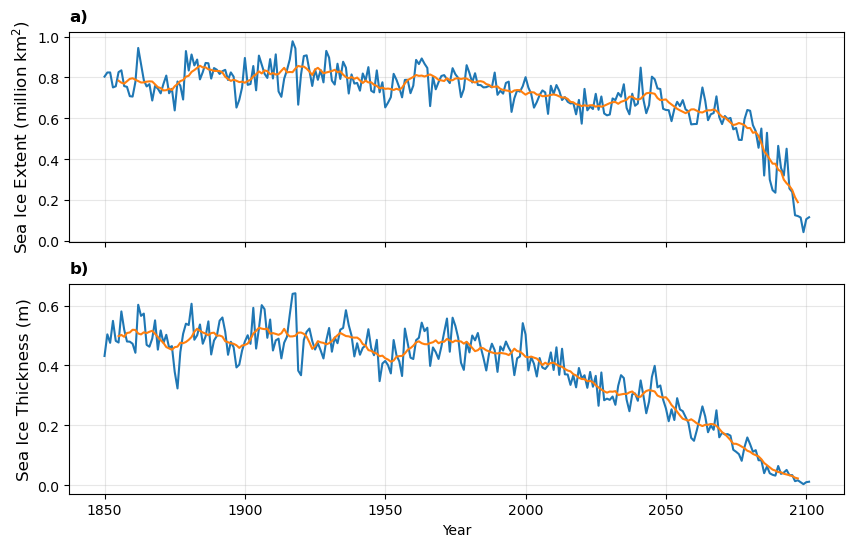

Execution time:  0.0 hours, 0.0 minutes, 0.38081955909729004 seconds


In [35]:
start_time = time.time()

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
years =np.arange(1850,2102)

# First plot              
ax[0].plot(years, april_aice)
ax[0].plot(years, april_aice.rolling(time=10, center=True).mean())
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)', fontsize=12)
#ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.3)
                 
# Second plot         
ax[1].plot(years, april_hi, label='CIS')
ax[1].plot(years, april_hi.rolling(time=10, center=True).mean())
ax[1].set_ylabel('Sea Ice Thickness (m)', fontsize=12)
ax[1].grid(alpha=0.3)              
ax[1].set_xlabel('Year')

ax[0].text(0, 1.05, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0, 1.05, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)

#plt.subplots_adjust(hspace=0.1)
#plt.savefig(path+'/plots/'+'plot10.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


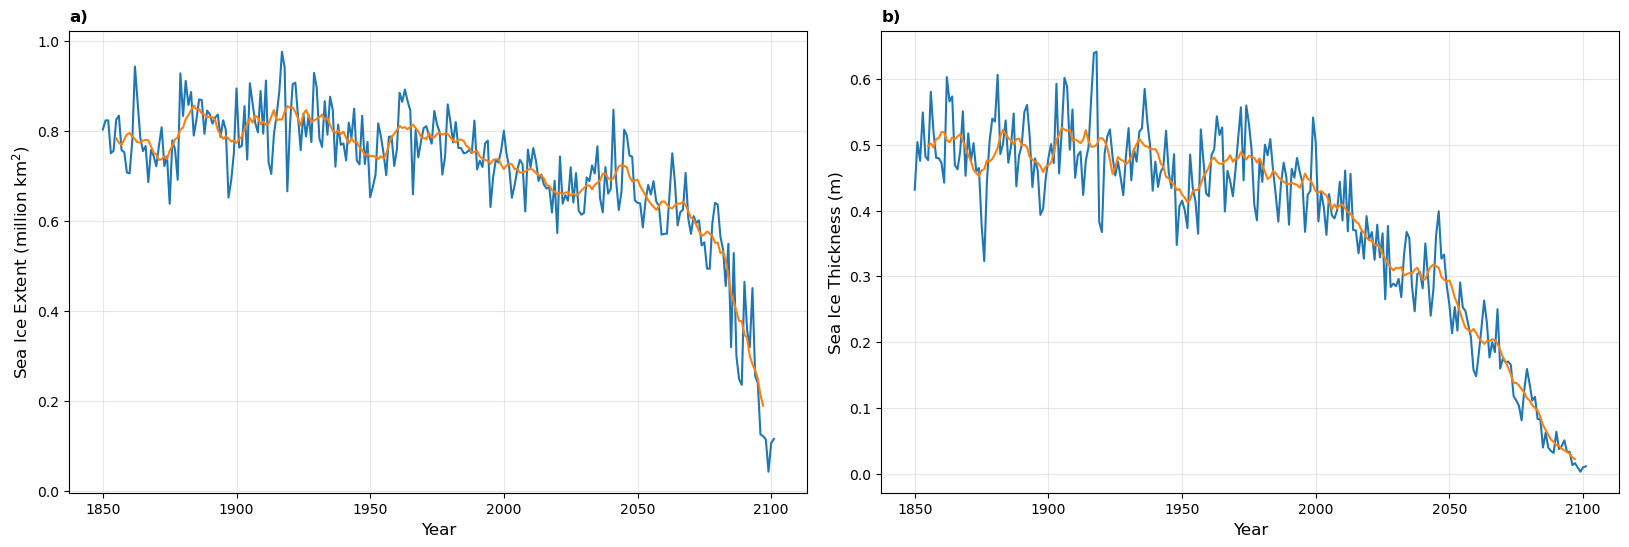

Execution time:  0.0 hours, 0.0 minutes, 0.7814335823059082 seconds


In [36]:
start_time = time.time()

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
years =np.arange(1850,2102)

# First plot              
ax[0].plot(years, april_aice)
ax[0].plot(years, april_aice.rolling(time=10, center=True).mean())
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)', fontsize=12)
#ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.3)
ax[0].set_xlabel('Year', fontsize=12)
                 
# Second plot         
ax[1].plot(years, april_hi, label='CIS')
ax[1].plot(years, april_hi.rolling(time=10, center=True).mean())
ax[1].set_ylabel('Sea Ice Thickness (m)', fontsize=12)
ax[1].grid(alpha=0.3)              
ax[1].set_xlabel('Year', fontsize=12)

ax[0].text(0, 1.02, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0, 1.02, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)

plt.subplots_adjust(wspace=0.1)
plt.savefig('3.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


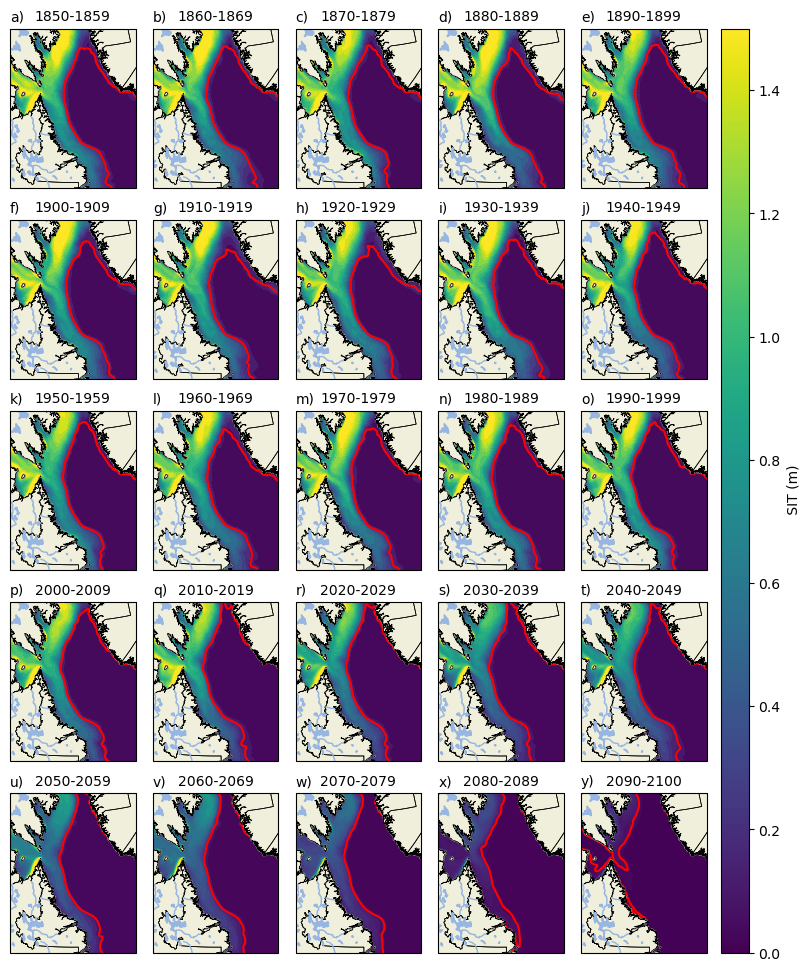

In [37]:
#=========sic_region==max========================

fig = plt.figure(figsize=(10,12))
selected_data = [hi_1850_59, hi_1860_69, hi_1870_79, hi_1880_89, hi_1890_99, hi_1900_09, hi_1910_19,
                 hi_1920_29, hi_1930_39, hi_1940_49, hi_1950_59, hi_1960_69, hi_1970_79, hi_1980_89,
                 hi_1990_99, hi_2000_09, hi_2010_19, hi_2020_29, hi_2030_39, hi_2040_49, hi_2050_59,
                 hi_2060_69, hi_2070_79, hi_2080_89, hi_2090_100]

selected_data1 = [sic_1850_59, sic_1860_69, sic_1870_79, sic_1880_89, sic_1890_99, sic_1900_09, sic_1910_19,
                 sic_1920_29, sic_1930_39, sic_1940_49, sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89,
                 sic_1990_99, sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49, sic_2050_59,
                 sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

global_min = np.min([np.nanmin(data.max('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data.max('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][2::12].mean('time'),
                   levels=[15], colors='red',linewidth=3, transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                norm=norm,levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][3::12].mean('time'),
                   levels=[15],colors='red',linewidth=3, transform=ccrs.PlateCarree())

    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel(' SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.3)
#plt.tight_layout()
#plt.savefig(path+'/plots/'+'plot3-April-thick.jpg',dpi=300, bbox_inches='tight')
plt.show()

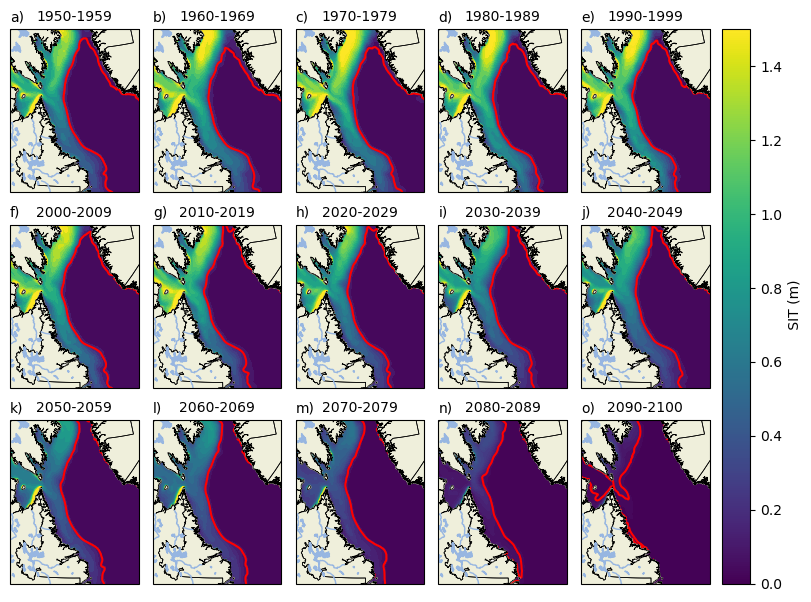

In [38]:
#=========sic_region==max========================

fig = plt.figure(figsize=(10,7.2))
selected_data = [hi_1950_59, hi_1960_69, hi_1970_79, hi_1980_89, hi_1990_99,
                 hi_2000_09, hi_2010_19, hi_2020_29, hi_2030_39, hi_2040_49,
                 hi_2050_59, hi_2060_69, hi_2070_79, hi_2080_89, hi_2090_100]

selected_data1 = [sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89, sic_1990_99,
                  sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49,
                  sic_2050_59, sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999',
          '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049',
          '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)']

global_min = np.min([np.nanmin(data.max('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data.max('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(3,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][2::12].mean('time'),
                   levels=[15], colors='red',linewidth=3, transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                norm=norm,levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][3::12].mean('time'),
                   levels=[15],colors='red',linewidth=3, transform=ccrs.PlateCarree())

    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel(' SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.3)
#plt.tight_layout()
plt.savefig('4.jpg',dpi=300, bbox_inches='tight')
plt.show()

# CESM2-LE

In [39]:
start_time=time.time()

Cesm_lr=xr.open_dataset(path+'/CESM2-LE/aice/EM_1001.nc')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.10337996482849121 seconds


In [40]:
aice_lr=Cesm_lr['aice']
tarea_lr=Cesm_lr['uarea']

In [41]:
%%time
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69

# Create a mask for Labrador coast 
mask_lr = ((aice_lr.TLAT >= lat_min) & (aice_lr.TLAT <= lat_max) &
        (aice_lr.TLON >= lon_min) & (aice_lr.TLON <= lon_max))

mask_lr2 = ((tarea_lr.TLAT >= lat_min) & (tarea_lr.TLAT <= lat_max) &
        (tarea_lr.TLON >= lon_min) & (tarea_lr.TLON <= lon_max))

# Apply the mask to the aice variable
aice_lr_region_ =aice_lr.where(mask_lr, drop=True)
tarea_lr_region_=tarea_lr.where(mask_lr2, drop=True)

CPU times: user 107 ms, sys: 785 ms, total: 892 ms
Wall time: 7.27 s


In [42]:
sic_greater_lr_15 = xr.where(aice_lr_region_ >= 0.15, 1, 0)
aice_lr_region = (sic_greater_lr_15 * tarea_lr_region_)/1e12

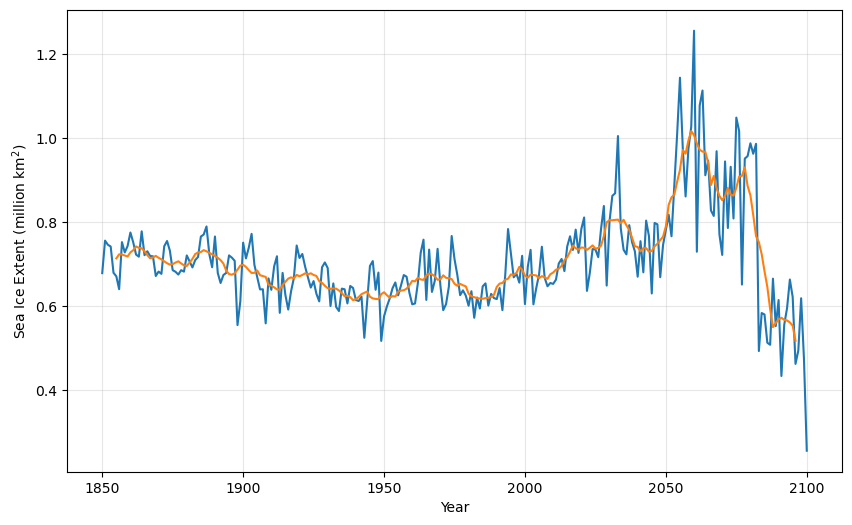

In [43]:
fig, ax=plt.subplots(figsize=(10,6))

april_aice_lr = aice_lr_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))



ax.plot(np.arange(1850,2101),april_aice_lr)
ax.plot(np.arange(1850,2101),april_aice_lr.rolling(time=10, center=True).mean())

#rect=ax.add_patch(Rectangle((2050, 0.63), 35, 0.66, edgecolor='red',facecolor='none',lw=2,))
#rect.set_zorder(10)
#plt.title('April Sea Ice Extent with a 10-year running mean for 1850 to 2100 \n(iHESP)', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
#plt.savefig('April_SIE.jpg',dpi=300, bbox_inches='tight')
plt.show()

# CIS

In [44]:
start_time=time.time()

obs=xr.open_mfdataset(path+'/Obs/CIS/CIS_year/*.nc')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 3.3909084796905518 seconds


In [45]:
obs_CT=obs['CT']
obs_area=obs['area']

In [46]:
lat_min, lat_max = 51, 69
lon_min, lon_max =-73, -45 

# Create a mask for Labrador coast 
maskobs = ((obs_CT.lat>= lat_min) & (obs_CT.lat <= lat_max) & (obs_CT.lon >= lon_min) & (obs_CT.lon<= lon_max))
maskobs1 = ((obs_area.lat>= lat_min) & (obs_area.lat <= lat_max) & (obs_area.lon >= lon_min) & (obs_area.lon<= lon_max))
obs_CT_region_ =obs_CT.where(maskobs, drop=True)
obs_area_region =obs_area.where(maskobs1, drop=True)

#### converting obs code figure to actual values

In [47]:
new_array=[]
start_time=time.time()
for i in obs_CT_region_.values.flatten():
    if i <= 100:
        new_array.append(i)
end_time=time.time()
elapsed_time = end_time - start_time

# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
print(sorted (set(new_array)))

Execution time:  0.0 hours, 1.0 minutes, 55.42888116836548 seconds
[-9.0, 1.0, 2.0, 10.0, 20.0, 30.0, 40.0, 50.0, 55.0, 60.0, 70.0, 80.0, 90.0, 91.0, 92.0, 98.0]


In [48]:
#converting code figure to actual values
listnum = [-9.0, 1.0, 2.0, 10.0, 20.0, 30.0, 40.0, 50.0, 55.0, 60.0, 70.0, 80.0, 90.0, 91.0, 92.0, 98.0]

#replace = [np.nan, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 0.95, 1, 0]

replace = [0, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 0.95, 1, 0]

for i in range(16):
    obs_CT_region_=obs_CT_region_.where(obs_CT_region_ != listnum[i], replace[i])

#### CIS SIE

In [49]:
obs

<xarray.Dataset>
Dimensions:       (time: 1612, rlat: 498, rlon: 562)
Coordinates:
  * time          (time) datetime64[ns] 1990-01-01 1990-01-08 ... 2020-12-25
    lon           (rlat, rlon) float64 dask.array<chunksize=(498, 562), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(498, 562), meta=np.ndarray>
  * rlon          (rlon) float64 -28.05 -27.95 -27.85 ... 27.85 27.95 28.05
  * rlat          (rlat) float64 -24.85 -24.75 -24.65 ... 24.65 24.75 24.85
Data variables: (12/13)
    rotated_pole  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    CT            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    CA            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    SA            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    FA            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    CB            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    ...            ...
    FB            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    CC            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    SC            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    FC            (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    bathy         (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
    area          (time, rlat, rlon) float32 dask.array<chunksize=(52, 498, 562), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 2.2.3 (https://mpimet.mpg....
    Conventions:    CF-1.4
    institution:    Canadian Ice Service
    contact:        Lynn.Pogson@ec.gc.ca
    comment:        1991-2020 sea ice atlas
    creation_date:  2021
    frequency:      weekly
    institute_id:   CIS
    references:     https://www.canada.ca/en/environment-climate-change/servi...
    history:        Tue Aug 08 16:27:22 2023: cdo -L -cat CIS_10km_1990*nc CI...
    CDO:            Climate Data Operators version 2.2.1 (https://mpimet.mpg....

In [51]:
obs_greater_15 = xr.where(obs_CT_region_ > 0.15, 1, 0)
obs_CT_region=(obs_greater_15 * obs_area_region)/1e6

In [85]:
obs_CT_region[100]

<xarray.DataArray (rlat: 206, rlon: 181)>
dask.array<getitem, shape=(206, 181), dtype=float64, chunksize=(206, 181), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1991-12-04T00:00:50
    lon      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
  * rlon     (rlon) float64 4.15 4.25 4.35 4.45 4.55 ... 21.85 21.95 22.05 22.15
  * rlat     (rlat) float64 -12.95 -12.85 -12.75 -12.65 ... 7.25 7.35 7.45 7.55

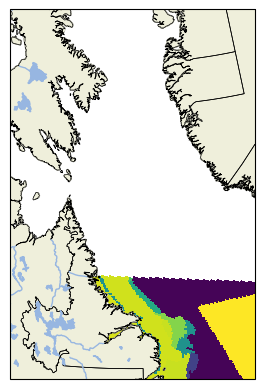

In [52]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(10,4.8))
x0, x1, y0, y1 =-68,-48,51,70
# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
ax = plt.subplot(1,1, 1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    
ax.coastlines(zorder=2)
ax.add_feature(cfeature.LAND, zorder=2)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
ax.set_extent([x0, x1, y0, y1])
contf=ax.pcolormesh(obs_CT[1].lon, obs_CT[1].lat, obs_CT[1],
                    transform=ccrs.PlateCarree())
plt.show()


In [53]:
#article
cis_1990_99 = obs_CT_region.sel(time=slice('1990', '1999'))
cis_2000_20 = obs_CT_region.sel(time=slice('2000', '2020'))

In [54]:
cis_1990_99_monthly = cis_1990_99.groupby('time.month').mean('time').sum(['rlat','rlon'])
cis_2000_20_monthly = cis_2000_20.groupby('time.month').mean('time').sum(['rlat','rlon'])

In [55]:
cis_1990_99_monmax = cis_1990_99.groupby('time.month').max('time').sum(['rlat','rlon'])
cis_2000_20_monmax = cis_2000_20.groupby('time.month').max('time').sum(['rlat','rlon'])

In [56]:
cis_1990_99_monmin = cis_1990_99.groupby('time.month').min('time').sum(['rlat','rlon'])
cis_2000_20_monmin = cis_2000_20.groupby('time.month').min('time').sum(['rlat','rlon'])

In [57]:
#-----------

In [58]:
obs_1990_99 = obs_CT_region.sel(time=slice('1990', '1999'))
obs_2000_09 = obs_CT_region.sel(time=slice('2000', '2009'))
obs_2010_19 = obs_CT_region.sel(time=slice('2010', '2019'))

In [59]:
obs_1990_99_monthly = obs_1990_99.groupby('time.month').mean('time').sum(['rlat','rlon'])
obs_2000_09_monthly = obs_2000_09.groupby('time.month').mean('time').sum(['rlat','rlon'])
obs_2010_19_monthly = obs_2010_19.groupby('time.month').mean('time').sum(['rlat','rlon'])

In [60]:
obs_1990_99_monmax = obs_1990_99.groupby('time.month').max('time').sum(['rlat','rlon'])
obs_2000_09_monmax = obs_2000_09.groupby('time.month').max('time').sum(['rlat','rlon'])
obs_2010_19_monmax = obs_2010_19.groupby('time.month').max('time').sum(['rlat','rlon'])

In [61]:
obs_1990_99_monmin = obs_1990_99.groupby('time.month').min('time').sum(['rlat','rlon'])
obs_2000_09_monmin = obs_2000_09.groupby('time.month').min('time').sum(['rlat','rlon'])
obs_2010_19_monmin = obs_2010_19.groupby('time.month').min('time').sum(['rlat','rlon'])

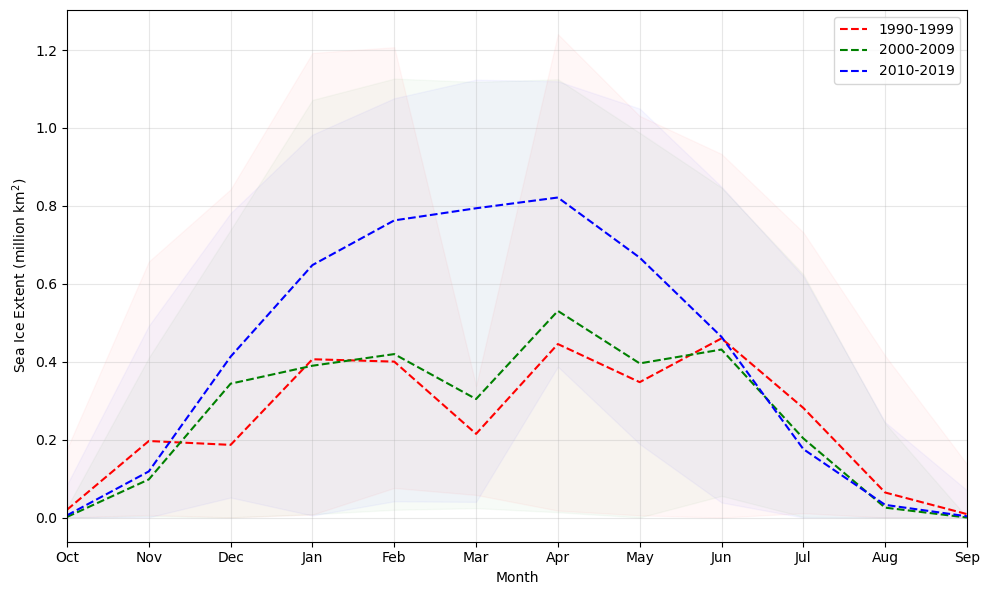

Execution time:  0.0 hours, 0.0 minutes, 40.424582719802856 seconds


In [62]:
# Set xticks to represent months from January to December
start_time = time.time()

fig,ax=plt.subplots(figsize=(10,6.05))
#all_data = [ model_1990_99_monthly,model_2000_09_monthly, model_2010_19_monthly ]
all_data_a =[obs_1990_99_monthly, obs_2000_09_monthly ,obs_2010_19_monthly]
all_data_b =[obs_1990_99_monmin, obs_2000_09_monmin ,obs_2010_19_monmin]
all_data_c =[obs_1990_99_monmax, obs_2000_09_monmax ,obs_2010_19_monmax]
labels=['1990','2000','2010']


labels = ['1990-1999', '2000-2009', '2010-2019']

cmapp=['lime', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'coral', 'maroon', 
      'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'red', 'green', 'blue',
      'gold', 'indigo', 'pink', 'olive','violet', 'brown', 'orange', 'black',]
colors=[cmapp[14], cmapp[15], cmapp[16]]

for i in range(len(all_data_a)):
    
    linestyle = '--'  # Default linestyle
    ax.plot(np.arange(12), np.append(all_data_a[i][9:],all_data_a[i][:9]), color=colors[i],  label=labels[i], linestyle=linestyle)
    ax.fill_between(np.arange(12), np.append(all_data_b[i][9:],all_data_b[i][:9]),np.append(all_data_c[i][9:],all_data_c[i][:9]),
                    color=colors[i], alpha=0.03)
    

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep'])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
plt.xlim(0,11)
plt.tight_layout()
#plt.savefig(path+'/plots/'+'plot1-new1.jpg', dpi=300, bbox_inches='tight')

plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

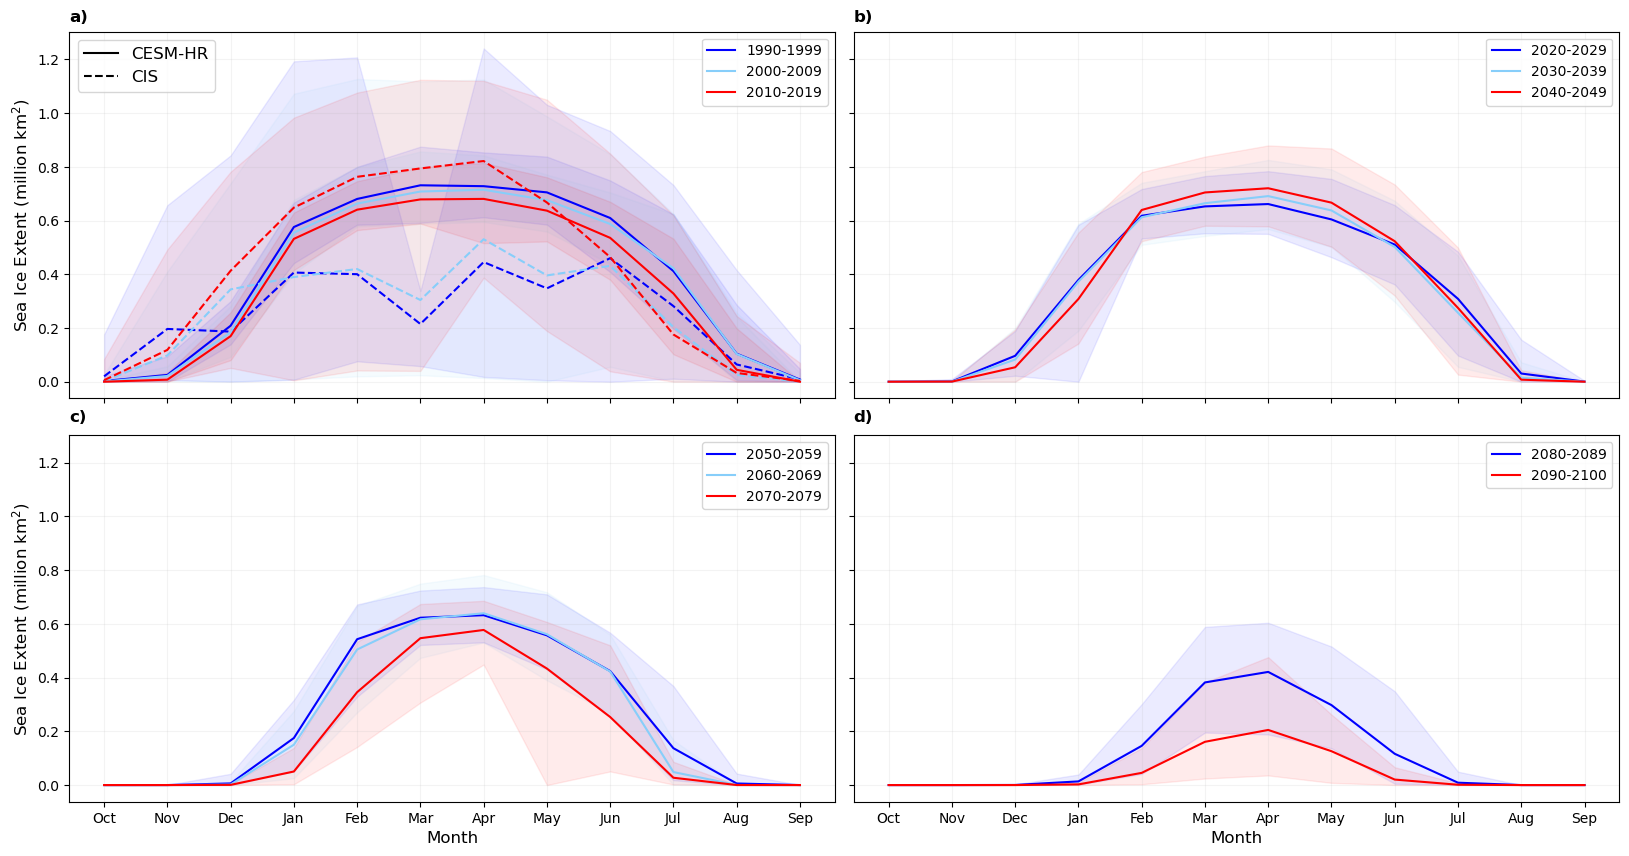

Execution time:  0.0 hours, 0.0 minutes, 18.812522411346436 seconds


In [63]:
start_time=time.time()
# Set xticks to represent months from January to December
fig,ax=plt.subplots(2,2,figsize=(20,10),sharex='all', sharey='all')

all_data = [aice_1990_99_monthly, aice_2000_09_monthly, aice_2010_19_monthly]
all_data1= [aice_2020_29_monthly, aice_2030_39_monthly, aice_2040_49_monthly]
all_data2= [aice_2050_59_monthly, aice_2060_69_monthly, aice_2070_79_monthly]
all_data3= [aice_2080_89_monthly, aice_2090_100_monthly]

max_data = [aice_1990_99_monmax, aice_2000_09_monmax, aice_2010_19_monmax]
max_data1= [aice_2020_29_monmax, aice_2030_39_monmax, aice_2040_49_monmax]
max_data2= [aice_2050_59_monmax, aice_2060_69_monmax, aice_2070_79_monmax]
max_data3= [aice_2080_89_monmax, aice_2090_100_monmax]

min_data = [aice_1990_99_monmin, aice_2000_09_monmin, aice_2010_19_monmin]
min_data1= [aice_2020_29_monmin, aice_2030_39_monmin, aice_2040_49_monmin]
min_data2= [aice_2050_59_monmin, aice_2060_69_monmin, aice_2070_79_monmin]
min_data3= [aice_2080_89_monmin, aice_2090_100_monmin]

all_data_a =[obs_1990_99_monthly, obs_2000_09_monthly ,obs_2010_19_monthly]
min_data_b =[obs_1990_99_monmin, obs_2000_09_monmin ,obs_2010_19_monmin]
max_data_b =[obs_1990_99_monmax, obs_2000_09_monmax ,obs_2010_19_monmax]

months= np.arange(0,12)

label = ['1990-1999', '2000-2009', '2010-2019']
label1= ['2020-2029', '2030-2039', '2040-2049']
label2= ['2050-2059', '2060-2069', '2070-2079']
label3= ['2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 6)
cmap1 = plt.cm.get_cmap('coolwarm', 4)

cmap = ['blue','lightskyblue','red']
cmap1 = ['blue','red']

for i in range(2):
    for j in range(2):   
        if i == 0:
            linestyle = '-'
            linestyle1 = '--'
            if j == 0:
                t=0
                for data in range(3):
                    ax[i,j].plot(months, np.append(all_data[data][9:], all_data[data][:9]), color=cmap[data], linestyle=linestyle, label=label[data])
                    ax[i,j].plot(months, np.append(all_data_a[data][9:], all_data_a[data][:9]), color=cmap[data], linestyle=linestyle1)
                    ax[i,j].fill_between(months, np.append(min_data[data][9:],min_data[data][:9]), np.append(max_data[data][9:],max_data[data][:9]), color=cmap[data], alpha=0.08)
                    ax[i,j].fill_between(months, np.append(min_data_b[data][9:],min_data_b[data][:9]), np.append(max_data_b[data][9:],max_data_b[data][:9]), color=cmap[data], alpha=0.08)
                    t+=2
            elif j == 1:
                t1=0
                for data1 in range(3):
                    ax[i,j].plot(months, np.append(all_data1[data1][9:], all_data1[data1][:9]), color=cmap[data1], linestyle=linestyle, label=label1[data1])
                    ax[i,j].fill_between(months, np.append(min_data1[data1][9:],min_data1[data1][:9]), np.append(max_data1[data1][9:],max_data1[data1][:9]), color=cmap[data1], alpha=0.08)
                    t1+=2       
            legend1=ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            
        #----------------------------------                      
        elif i==1:
            linestyle = '-'
            if j == 0:
                t2=0
                for data2 in range(3):
                    ax[i,j].plot(months, np.append(all_data2[data2][9:], all_data2[data2][:9]), color=cmap[data2], linestyle=linestyle, label=label2[data2])
                    ax[i,j].fill_between(months, np.append(min_data2[data2][9:],min_data2[data2][:9]), np.append(max_data2[data2][9:],max_data2[data2][:9]), color=cmap[data2], alpha=0.08)
                    t2+=2
            elif j == 1:
                t3=0
                for data3 in range(2):
                    ax[i,j].plot(months, np.append(all_data3[data3][9:], all_data3[data3][:9]), color=cmap1[data3], linestyle=linestyle, label=label3[data3])
                    ax[i,j].fill_between(months, np.append(min_data3[data3][9:],min_data3[data3][:9]), np.append(max_data3[data3][9:],max_data3[data3][:9]), color=cmap1[data3], alpha=0.08)
                    t3+=2
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.15)
            ax[i,j].set_xlabel('Month',  fontsize=12)
            ax[i,j].set_xticks(months, ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep',])
            
        #---------------------------------- 
             
        ax[0,0].set_ylabel('Sea Ice Extent (million km$^2$)',  fontsize=12)
        ax[1,0].set_ylabel('Sea Ice Extent (million km$^2$)', fontsize=12)
        
        #---------------------------------- 
        
        
for k in range(4):
    #x=[0.125,0.387,0.649,0.125,0.387,0.649]   
    #y=[0.89,0.89,0.89,0.49,0.49,0.49] 
    #letter=['a)','b)','c)','d)','e)','f)']
    x=[0.125,0.517,0.125,0.517]   
    y=[0.89,0.89,0.49,0.49] 
    letter=['a)','b)','c)','d)']
    fig.text(x[k],y[k],letter[k],fontweight='bold', fontsize=12)

    
    
line_for_CESM_HR = plt.Line2D([0], [0], color='black', linestyle='-')
line_for_cis = plt.Line2D([0], [0], color='black', linestyle='--')

# Capture the existing legend
first_legend = ax[0,0].legend(loc='upper right')
# Add the legend back to ax[0,0] so it isn't removed by the new legend
ax[0,0].add_artist(first_legend)

# Add the custom legend
ax[0,0].legend([line_for_CESM_HR, line_for_cis], ['CESM-HR', 'CIS'], loc='upper left', fontsize=12)

#plt.tight_layout()

plt.savefig('1a.jpg',dpi=300, bbox_inches='tight')


plt.subplots_adjust(wspace=0.025, hspace=0.1)
plt.show()



end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
#every 20 years
# min and max 

#### April CIS and CESM-HR

In [64]:
#slicing and resampling 
model_SIE_hist =aice_hist_region.sel(time=slice('1990-01-01','2006-01-01'))
model_SIE_proj =aice_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
model_SIE= xr.concat([model_SIE_hist, model_SIE_proj], dim='time')

obs_SIE=obs_CT_region.resample(time='1M').mean().sel(time=slice('1990-01-01','2020-12-31'))

In [65]:
#slicing and resampling 
model_SIE_april=model_SIE[3::12].sum(('nj', 'ni'))
obs_SIE_april=obs_SIE[3::12].sum(['rlat','rlon'])

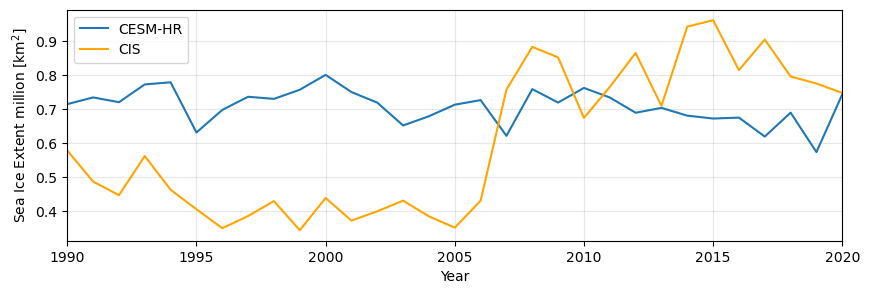

Execution time:  0.0 hours, 0.0 minutes, 3.780360698699951 seconds


In [66]:
#Plot of the obs and model from 1990 to 2018
fig, ax=plt.subplots(figsize=(10,3))
start_time=time.time()

ax.plot(np.arange(1990,2021), model_SIE_april, label='CESM-HR')
ax.plot(np.arange(1990,2021), obs_SIE_april, color='orange', label='CIS')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Ice Extent million [km$^2$]')
ax.legend()
ax.grid(alpha=0.3)
plt.xlim(1990,2020)
plt.savefig('6.jpg',dpi=300, bbox_inches='tight') 
plt.show()


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

#### spatial plot

In [67]:
#model_CT_sel=model_CT.sel(time=slice('1990','2019'))
model1=aice_hist_region_.sel(time=slice('1990-01-01','2006-01-01'))
model2=aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
model_CT_sel= xr.concat([model1, model2], dim='time')

obs_CT_sel=obs_CT_region_.resample(time='1M').mean().sel(time=slice('1990','2020'))

In [68]:
obs_months=obs_CT_sel.groupby('time.month').mean('time')
model_months=model_CT_sel.groupby('time.month').mean('time')

In [69]:
#article
cis_sic_1990_99 = obs_CT_region_.resample(time='1M').mean().sel(time=slice('1990', '1999'))
cis_sic_2000_20 = obs_CT_region_.resample(time='1M').mean().sel(time=slice('2000', '2020'))


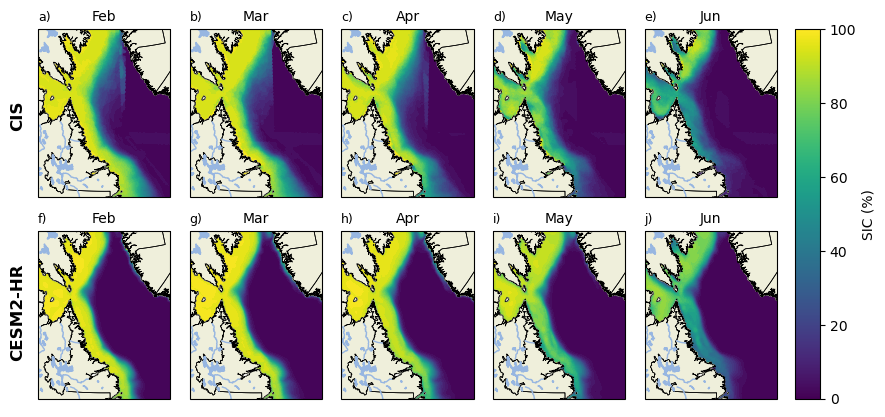

Execution time:  0.0 hours, 0.0 minutes, 50.76988744735718 seconds


In [70]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(10,4.8))
selected_data=[obs_months[1],obs_months[2],obs_months[3],obs_months[4],obs_months[5],
          model_months[1],model_months[2],model_months[3],model_months[4],model_months[5]]

titles = ['Feb','Mar','Apr','May','Jun','Feb','Mar','Apr','May','Jun']
letter=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)']



norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,5, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    if i in [0,1,2,3,4]:
        contf=ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i].fillna(0)*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    if i in [5,6,7,8,9]:
        contf=ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i],
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.025, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

name=['CIS', 'CESM2-HR']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
plt.savefig('5.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### ARTICLE PLOT SECTION

### Fig 2

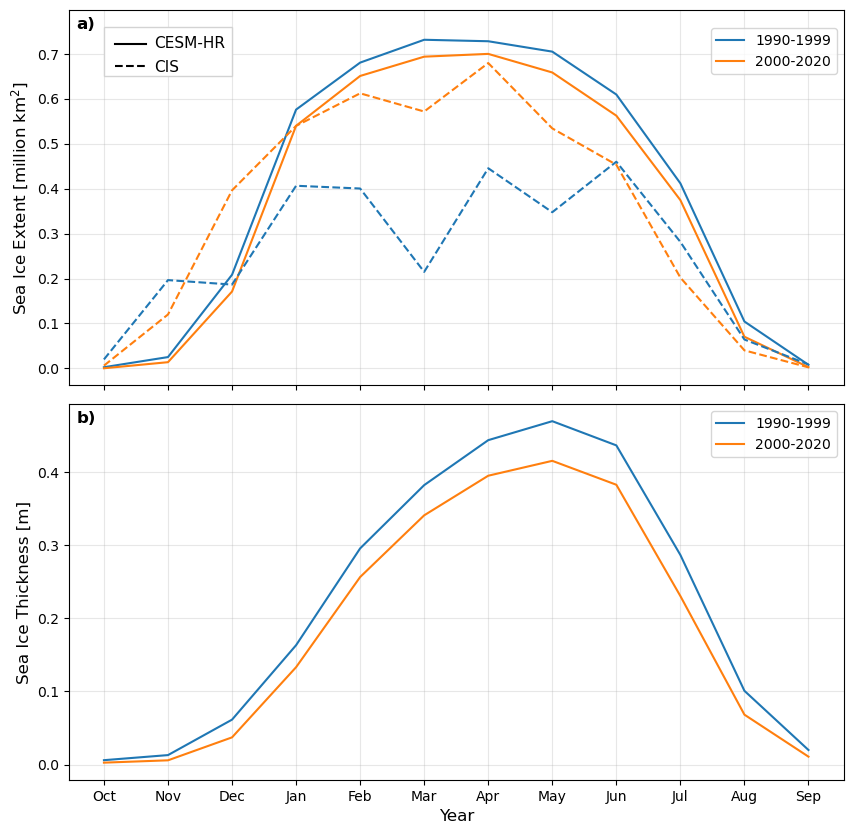

Execution time:  0.0 hours, 0.0 minutes, 7.1965649127960205 seconds


In [71]:
###article

start_time = time.time()
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

model_cis_dt = [model_1990_99_monthly, model_2000_20_monthly, cis_1990_99_monthly, cis_2000_20_monthly]
mc_data_mx= [model_1990_99_monmax, model_2000_20_monmax, cis_1990_99_monmax, cis_2000_20_monmax]
mc_data_mn= [model_1990_99_monmin, model_2000_20_monmin, cis_1990_99_monmin, cis_2000_20_monmin]

hi_dt =[model_hi_1990_99_monthly, model_hi_2000_20_monthly]
hi_data_mx =[model_hi_1990_99_monmax, model_hi_2000_20_monmax]
hi_data_mn =[model_hi_1990_99_monmin, model_hi_2000_20_monmin]


cl = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']
month_dt = ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep']
lb = ['1990-1999', '2000-2020']

# First plot
for i in range (len(model_cis_dt)):
    if i <2:
        ls='-'
        ax[0].plot(month_dt, np.append(model_cis_dt[i][9:], model_cis_dt[i][:9]), linestyle=ls, color=cl[i], label=lb[i])
        #ax[0].fill_between(month_dt, np.append(mc_data_mn[i][9:],mc_data_mn[i][:9]),
                           #np.append(mc_data_mx[i][9:],mc_data_mx[i][:9]),
                    #color=cl[i], alpha=0.03)
        ax[0].legend(loc='upper right', bbox_to_anchor=(1.0,0.97))
        
    if i >=2:
        ls='--'
        ax[0].plot(month_dt, np.append(model_cis_dt[i][9:], model_cis_dt[i][:9]), linestyle=ls, color=cl[i])
        #ax[0].fill_between(month_dt, np.append(mc_data_mn[i][9:],mc_data_mn[i][:9]),
                           #np.append(mc_data_mx[i][9:],mc_data_mx[i][:9]),
                    #color=cl[i], alpha=0.03)
        
    ax[0].set_ylabel('Sea Ice Extent [million km$^2$]', fontsize=12)
    ax[0].grid(alpha=0.3)
    
                 
# Second plot  
for i in range (len(hi_dt)):
    ls='-'
    ax[1].plot(month_dt, np.append(hi_dt[i][9:], hi_dt[i][:9]), linestyle=ls, color=cl[i], label=lb[i])
    #ax[1].fill_between(month_dt, np.append(hi_data_mn[i][9:],hi_data_mn[i][:9]),
                           #np.append(hi_data_mx[i][9:],hi_data_mx[i][:9]),
                    #color=cl[i], alpha=0.03)
    ax[1].legend(loc='upper right')
    ax[1].set_ylabel('Sea Ice Thickness [m]', fontsize=12)
    ax[1].set_xlabel('Year', fontsize=12)
    ax[1].grid(alpha=0.3)  

rectangle = patches.Rectangle((0.005, 0.65), 2, 0.11, edgecolor='lightgray',  facecolor='white',linewidth=1, zorder=10)
ax[0].add_patch(rectangle)

# Add CESM-HR text and line
ax[0].text(0.11, 0.9, 'CESM-HR', transform=ax[0].transAxes, fontsize=11, zorder=11)
ax[0].plot([0.06, 0.1], [0.91, 0.91], color='black', transform=ax[0].transAxes, linestyle='-', zorder=11)

# Add CIS text and dashed line
ax[0].text(0.11, 0.835, 'CIS', transform=ax[0].transAxes, fontsize=11, zorder=11)
ax[0].plot([0.06, 0.1], [0.85, 0.85], color='black', transform=ax[0].transAxes, linestyle='--', zorder=11)

    
ax[0].text(0.01, 0.95, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0.01, 0.95, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)


plt.subplots_adjust(hspace=0.05)
plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 3

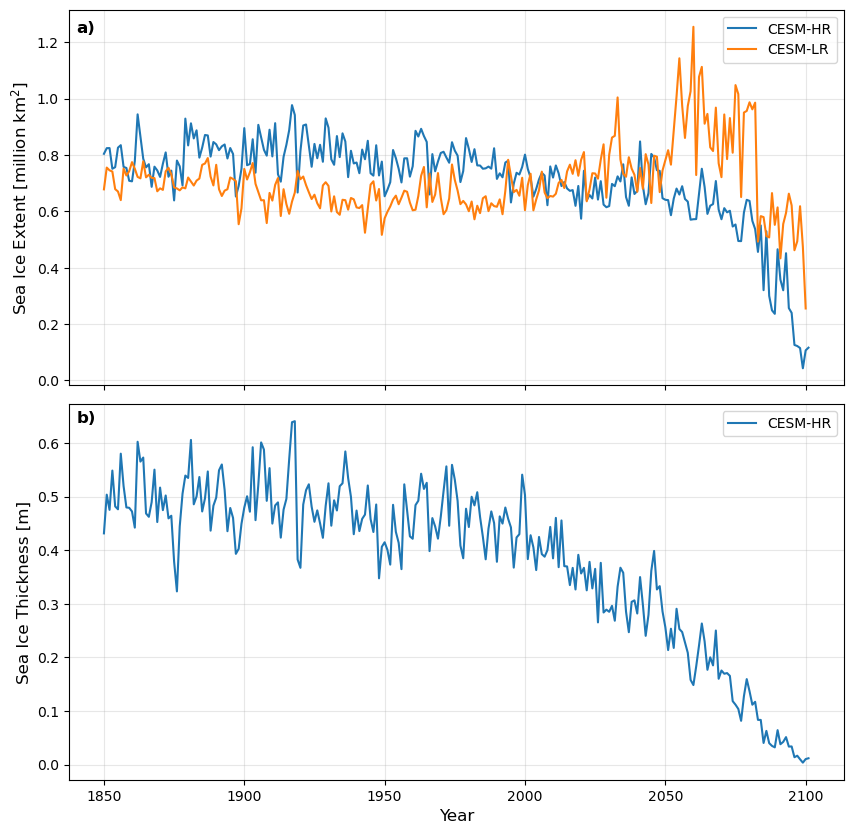

Execution time:  0.0 hours, 0.0 minutes, 0.7456560134887695 seconds


In [72]:
start_time = time.time()

fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
years =np.arange(1850,2102)
yearss =np.arange(1850,2101)

# First plot              
ax[0].plot(years, april_aice, label='CESM-HR')
ax[0].plot(yearss, april_aice_lr, label='CESM-LR')
#ax[0].plot(years, april_aice.rolling(time=10, center=True).mean())
ax[0].set_ylabel('Sea Ice Extent [million km$^2$]', fontsize=12)
ax[0].legend(loc='upper right')
ax[0].grid(alpha=0.3)
                 
# Second plot         
ax[1].plot(years, april_hi, label='CESM-HR')
#ax[1].plot(years, april_hi.rolling(time=10, center=True).mean())
ax[1].set_ylabel('Sea Ice Thickness [m]', fontsize=12)
ax[1].grid(alpha=0.3)
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Year', fontsize=12)

ax[0].text(0.01, 0.94, 'a)',transform=ax[0].transAxes, fontweight='bold', fontsize=12)
ax[1].text(0.01, 0.95, 'b)',transform=ax[1].transAxes, fontweight='bold', fontsize=12)

plt.subplots_adjust(hspace=0.05)
plt.savefig('Fig3.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


### Fig 4

In [73]:
model_sic_1990_99=model_sic_1990_99[3::12].mean('time')
model_sic_2000_20=model_sic_2000_20[3::12].mean('time')
model_sic_2040_60=model_sic_2040_60[3::12].mean('time')
model_sic_2080_100=model_sic_2080_100[3::12].mean('time')
cis_sic_1990_99=cis_sic_1990_99[3::12].fillna(0).mean('time')*100
cis_sic_2000_20=cis_sic_2000_20[3::12].fillna(0).mean('time')*100

In [74]:
cis_sic_2000_20

<xarray.DataArray 'CT' (rlat: 206, rlon: 181)>
dask.array<mul, shape=(206, 181), dtype=float32, chunksize=(206, 181), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(206, 181), meta=np.ndarray>
  * rlon     (rlon) float64 4.15 4.25 4.35 4.45 4.55 ... 21.85 21.95 22.05 22.15
  * rlat     (rlat) float64 -12.95 -12.85 -12.75 -12.65 ... 7.25 7.35 7.45 7.55

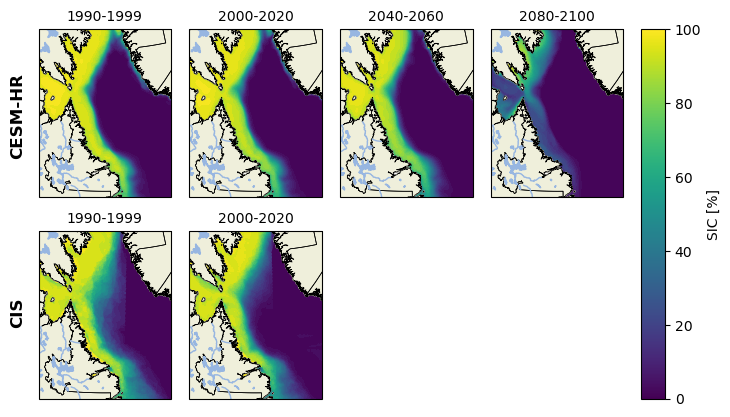

Execution time:  0.0 hours, 0.0 minutes, 25.272053003311157 seconds


In [75]:
#=========sic_region==max========================

fig = plt.figure(figsize=(8,4.8))
sic_data = [model_sic_1990_99, model_sic_2000_20, model_sic_2040_60, model_sic_2080_100,
                 cis_sic_1990_99, cis_sic_2000_20]

#hi_data1 = [model_hi_1990_99, model_hi_2000_20, model_hi_2040_60, model_hi_2080_100]
titles = ['1990-1999', '2000-2020', '2040-2060', '2080-2100', '1990-1999', '2000-2020']


norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(sic_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,4, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    if i in [0,1,2,3]:
        contf=ax.contourf(sic_data[i].TLON, sic_data[i].TLAT, sic_data[i],
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    if i in [4,5]:
        contf=ax.contourf(sic_data[i].lon, sic_data[i].lat, sic_data[i],
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
    
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.03, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC [%]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)  

name=['CESM-HR','CIS']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
plt.savefig('Fig4.jpg',dpi=300, bbox_inches='tight')
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
    
    
    

plt.show()

### Fig 5

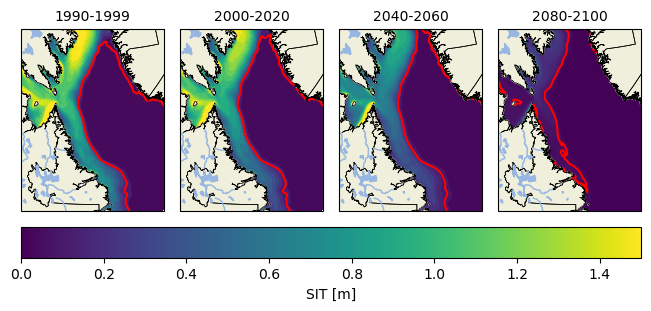

Execution time:  0.0 hours, 0.0 minutes, 34.15036749839783 seconds


In [76]:
#=========sic_region==max========================

fig = plt.figure(figsize=(8,2.4))
sic_data = [model_sic_1990_99, model_sic_2000_20, model_sic_2040_60, model_sic_2080_100]

hi_data1 = [model_hi_1990_99, model_hi_2000_20, model_hi_2040_60, model_hi_2080_100]
titles = ['1990-1999', '2000-2020', '2040-2060', '2080-2100',]

global_min = np.min([np.nanmin(data.max('time').values) for data in hi_data1])
#global_max = np.max([np.nanmax(data.max('time').values) for data in hi_data1])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(sic_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,4, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
   
    ax.contourf(hi_data1[i].TLON, hi_data1[i].TLAT, hi_data1[i][3::12].mean('time'),levels=45, norm=norm, transform=ccrs.PlateCarree())
    ax.contour(sic_data[i].TLON, sic_data[i].TLAT, sic_data[i],levels=[15],colors='red',linewidth=3,transform=ccrs.PlateCarree())
    #if i in [4,5]:
        #contf=ax.contourf(sic_data[i].lon, sic_data[i].lat, sic_data[i],
                          #levels=45, norm=norm, transform=ccrs.PlateCarree())
    
    
cbar_ax = fig.add_axes([0.125, -0.08, 0.775, 0.13])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='horizontal', label='SIT [m]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT [m]', fontsize=10)  


plt.subplots_adjust(wspace=0.11)
#plt.subplots_adjust(hspace=0.7)
plt.savefig('Fig5.jpg',dpi=300, bbox_inches='tight')
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
    
    
    

plt.show()

### Fig 6

In [77]:
hi_month_1980_2005=hi_hist_region.sel(time=slice('1980-01-01','2006-01-01'))
hi_month_2006_2020=hi_proj_region.sel(time=slice('2006-02-01','2020-12-31'))
hi_region_1980_2020=xr.concat((hi_month_1980_2005,hi_month_2006_2020 ), dim='time')
hi_months=hi_region_1980_2020.groupby('time.month').mean('time')

In [78]:
#plot for article
sic_month_1980_2005 = aice_hist_region_.sel(time=slice('1980-01-01','2006-01-01'))
sic_month_2006_2020 = aice_proj_region_.sel(time=slice('2006-02-01','2020-12-31'))
sic_region_1980_2020= xr.concat([sic_month_1980_2005, sic_month_2006_2020], dim='time')
sic_months=sic_region_1980_2020.groupby('time.month').mean('time')

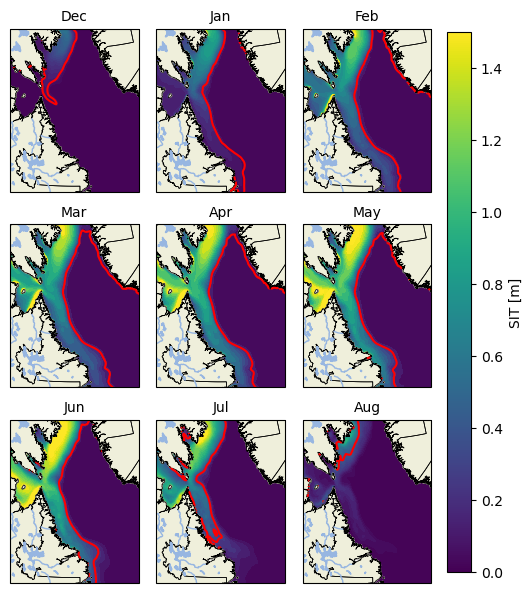

In [79]:
fig = plt.figure(figsize=(6, 7.2))

selected_data= [hi_months[11], hi_months[0], hi_months[1], hi_months[2], hi_months[3], hi_months[4], hi_months[5], hi_months[6],hi_months[7]]
selected_data1=[sic_months[11],sic_months[0],sic_months[1],sic_months[2],sic_months[3], sic_months[4], sic_months[5],sic_months[6],sic_months[7]]


titles = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']
#name=['a)','b)','c)','d)','e)','f)','g)','h)','i)']

global_min = np.min([np.nanmin(data.values) for data in selected_data])
global_max = np.max([np.nanmax(data.values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67


# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(3,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    #ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i], levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i], levels=[15], colors='red',
               linewidth=3, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.89, 0.125, 0.04, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT [m]', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
plt.savefig('Fig6.jpg',dpi=300, bbox_inches='tight')
plt.show()

### Fig 7

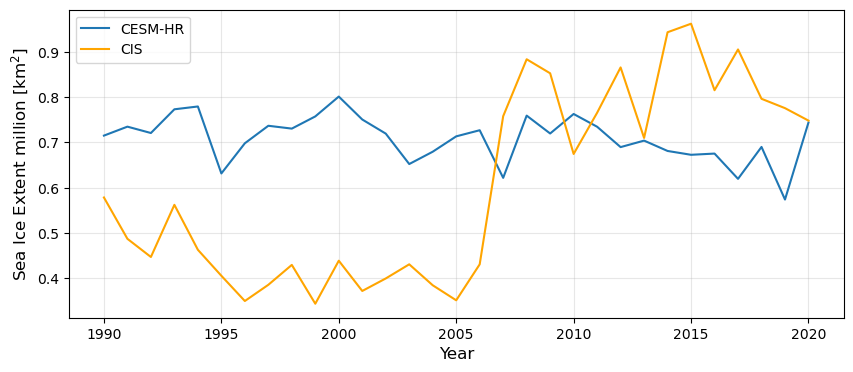

Execution time:  0.0 hours, 0.0 minutes, 3.211221694946289 seconds


In [80]:
#Plot of the obs and model from 1990 to 2018
fig, ax=plt.subplots(figsize=(10,4))
start_time=time.time()

ax.plot(np.arange(1990,2021), model_SIE_april, label='CESM-HR')
ax.plot(np.arange(1990,2021), obs_SIE_april, color='orange', label='CIS')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sea Ice Extent million [km$^2$]', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
#plt.xlim(1990,2019)
plt.savefig('Fig7.jpg',dpi=300, bbox_inches='tight') 
plt.show()


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 8

In [81]:
#----------
obs_CT_1990_99 = obs_CT_sel.sel(time=slice('1990', '1999'))
obs_CT_2000_09 = obs_CT_sel.sel(time=slice('2000', '2009'))
obs_CT_2010_20 = obs_CT_sel.sel(time=slice('2010', '2020'))

#----------
model_CT_1990_99 = model_CT_sel.sel(time=slice('1990', '1999'))
model_CT_2000_09 = model_CT_sel.sel(time=slice('2000', '2009'))
model_CT_2010_20 = model_CT_sel.sel(time=slice('2010', '2020'))

In [82]:
model_CT_2010_20

<xarray.DataArray 'aice' (time: 132, nj: 345, ni: 227)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 2010-01-01 00:00:00 ... 2020-12-01 00:00:00
    TLON     (nj, ni) float32 1e+30 1e+30 1e+30 1e+30 ... 305.7 305.9 306.0
    TLAT     (nj, ni) float32 1e+30 1e+30 1e+30 1e+30 ... 71.88 71.9 71.92 71.94
Dimensions without coordinates: nj, ni
Attributes:
    long_name:     ice area  (aggregate)
    units:         %
    comment:       none
    cell_methods:  time: mean
    time_rep:      averaged

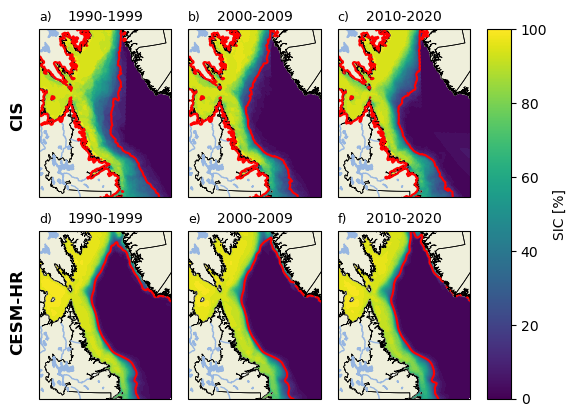

Execution time:  0.0 hours, 0.0 minutes, 34.25866508483887 seconds


In [83]:
start_time = time.time()

# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(6,4.8))

selected_data=[obs_CT_1990_99,obs_CT_2000_09, obs_CT_2010_20, model_CT_1990_99, model_CT_2000_09,model_CT_2010_20]
titles=['1990-1999', '2000-2009','2010-2020','1990-1999', '2000-2009','2010-2020']
#letter=['a)','b)','c)','d)','e)','f)']
norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
    if i in [3,4,5]:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
        ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                          levels=[15], colors='red',linewidth=3, transform=ccrs.PlateCarree())
   
    if i in [0,1,2]:
        contf=ax.contourf(selected_data[i].lon, selected_data[i].lat, selected_data[i][3::12].fillna(0).mean('time')*100,
                          levels=45, norm=norm, transform=ccrs.PlateCarree())
        ax.contour(selected_data[i].lon, selected_data[i].lat, selected_data[i][3::12].fillna(0).mean('time')*100,
                          levels=[15], colors='red', linewidth=3, transform=ccrs.PlateCarree())

    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)  

name=['CIS', 'CESM-HR']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
plt.savefig('Fig8.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Fig 9

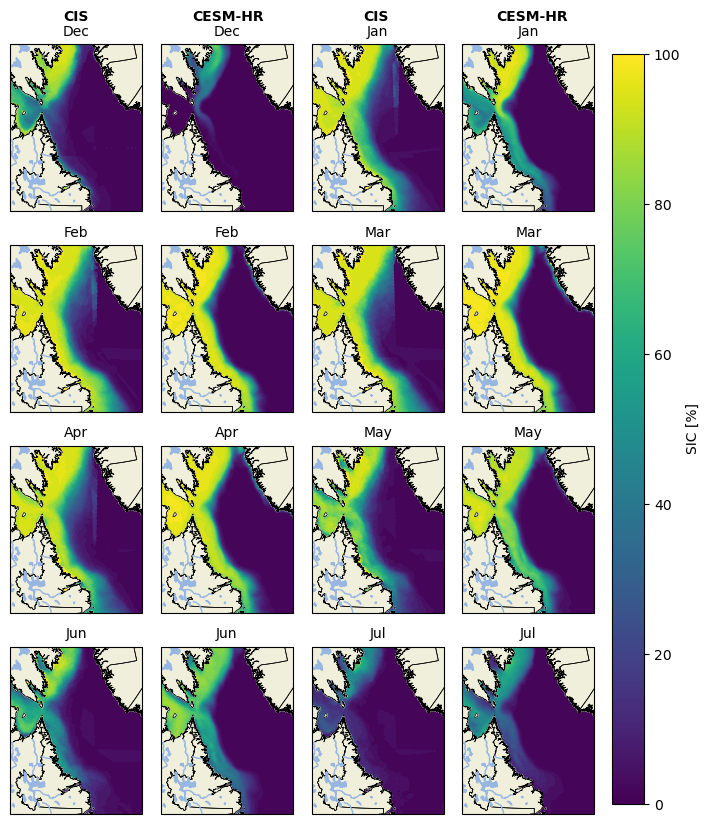

Execution time:  0.0 hours, 1.0 minutes, 16.51046323776245 seconds


In [84]:
start_time = time.time()
#fig = plt.figure(figsize=(8, 4.8))
fig = plt.figure(figsize=(8,10))
obs_data=[obs_months[11], obs_months[0],obs_months[1],obs_months[2],obs_months[3],obs_months[4],
          obs_months[5],obs_months[6]]

model_data=[model_months[11],model_months[0],model_months[1],model_months[2],model_months[3],model_months[4],
            model_months[5],model_months[6]]

titles = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul',]
#name=['a)','c)','e)','g)','i)','k)','m)','o)','q)']
#name1=['b)','d)','f)','h)','j)','l)','n)','p)','r)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i in range(16):
    index = i // 2 
    
    if i % 2 == 0:
        ax = plt.subplot(4, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        ax.set_title(titles[index], fontsize=10)
        ax.add_feature(cfeature.LAND, zorder=2)
        ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
        ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
        ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
        ax.set_extent([x0, x1, y0, y1])
        ax.contourf(obs_data[index].lon, obs_data[index].lat, obs_data[index].fillna(0)*100, levels=45,
                    norm=norm, transform=ccrs.PlateCarree())
        #ax.text(0,1.05,name[index], transform=ax.transAxes, fontsize=10)
        
    else:
        ax = plt.subplot(4, 4, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                     central_latitude=c_lat,
                                                                     standard_parallels=(y0, y1)))
        if index < len(model_data):
            ax.set_title(titles[index], fontsize=10)
            ax.add_feature(cfeature.LAND, zorder=2)
            ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, zorder=2)
            ax.add_feature(cfeature.LAKES.with_scale('10m'), zorder=2)
            ax.add_feature(cfeature.RIVERS.with_scale('10m'), zorder=2)
            ax.set_extent([x0, x1, y0, y1])
            ax.contourf(model_data[index].TLON, model_data[index].TLAT, model_data[index], levels=45,
                        norm=norm, transform=ccrs.PlateCarree())
            #ax.text(0,1.05,name1[index], transform=ax.transAxes, fontsize=10)

cbar_ax = fig.add_axes([0.9, 0.12, 0.04, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC [%]')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC [%]', fontsize=10)

name=['CIS', 'CESM-HR','CIS', 'CESM-HR']
x=[0.23, 0.42, 0.605, 0.8]
y=[0.9,0.9,0.9,0.9]
for i in range (4):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='horizontal',
             rotation_mode='anchor',fontsize=10)


plt.subplots_adjust(wspace=-0.1)
plt.savefig('Fig9.jpg',dpi=300, bbox_inches='tight')
plt.show()



end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")